In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")


## Latar belakang dan Rumusan Masalah

### Gambaran Umum Perusahaan Supermarket Brightmart

Supermarket BrightMart (atau Brightmart) Brightmart adalah perusahaan di sektor ritel atau supermarket, yang menjual berbagai macam produk mulai dari kebutuhan pokok hingga kebutuhan tersier.

Sebagai upayanya untuk memahami pelanggan-pelanggannya dengan lebih baik, tim marketing Brightmart mengumpulkan data dari pelanggan-pelanggannya. Informasi yang disimpan antara lain demografi pelanggan, pembelian produk, respons terhadap kampanye, serta kanal-kanal pembelian yang dipakai pelanggan. Data tersebut dikumpulkan dalam suatu file yang bernama 'Supermarket Customers.csv'

Dengan data pelanggan tersebut, tim marketing Brightmart ingin membuat strategi kampanye yang mampu mendatangkan profitabilitas jangka panjang. Mereka berharap mampu meningkatkan pendapatan Supermarket Brightmart melalui strategi marketing yang lebih memahami kebutuhan pelanggan.

### Rumusan Masalah

Analisis ini bertujuan untuk mempelajari segmen pelanggan berdasarkan struktur rumah tangga yang paling tepat untuk diberi diskon sesuai kebiasaan belanja mereka.

Pertanyaan yang dapat dianalisis:
1. Bagaimana segmentasi pelanggan berdasarkan struktur rumah tangga (sendiri, berpasangan, dengan anak)?
2. Segmen barang apa yang menimbulkan pengeluaran biaya paling besar untuk tiap jenis struktur rumah tangga?
3. Seperti apa penggunaan diskon bagi segmen-segmen pelanggan tersebut?
4. Berdasarkan analisis kebiasaan belanja (jenis produk), segmen pelanggan mana yang paling responsif terhadap diskon?

Dengan menjawab pertanyaan-pertanyaan di atas, analisis diharapkan bisa memberikan insight yang medalam terhadap segmen berharga dan memberikan rekomendasi yang bermanfaat bagi tim marketing Brightmart untuk meningkatkan efisiensi biaya pemasaran, serta meningkatkan profitabilitas dan menjaga loyalitas dari pelanggan yang paling bernilai.

# Data Understanding and Cleaning

Data dari Supermarket Customers CSV

People

- ID: ID unik setiap pelanggan
- Year_Birth: Tahun lahir pelanggan
- Education: Tingkat pendidikan pelanggan
- Marital_Status: Status pernikahan pelanggan
- Income: Pendapatan tahunan pelanggan
- Kidhome: Jumlah anak-anak di rumah tangga pelanggan
- Teenhome: Jumlah remaja di rumah tangga pelanggan
- Dt_Customer: Tanggal pelanggan mulai berbelanja di supermarket
- Recency: Hari terakhir pelanggan melakukan pembelian
- Complain: 1 jika pelanggan melayangkan keluhan di dua tahun terakhir, 0 jika tidak

Produk
- MntWines: Jumlah yang dibelanjakan untuk wine dalam 2 tahun terakhir
- MntFruits: Jumlah yang dibelanjakan untuk buah-buahan dalam 2 tahun terakhir
- MntMeatProducts: Jumlah yang dibelanjakan untuk daging dalam 2 tahun terakhir
- MntFishProducts: Jumlah yang dibelanjakan untuk ikan dalam 2 tahun terakhir
- MntSweetProducts: Jumlah yang dibelanjakan untuk permen dalam 2 tahun terakhir
- MntGoldProds: Jumlah yang dibelanjakan untuk emas dalam 2 tahun terakhir

Promosi
- NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon
- AcceptedCmp1: 1 jika pelanggan menerima penawaran di kampanye pertama, 0 jika tidak
- AcceptedCmp2: 1 jika pelanggan menerima penawaran di kampanye kedua, 0 jika tidak
- AcceptedCmp3: 1 jika pelanggan menerima penawaran di kampanye ketiga, 0 jika tidak
- AcceptedCmp4: 1 jika pelanggan menerima penawaran di kampanye ke-4, 0 jika tidak
- AcceptedCmp5: 1 jika pelanggan menerima penawaran di kampanye ke-5, 0 jika tidak
- Response: 1 jika pelanggan menerima penawaran di kampanye terakhir, 0 jika tidak

Place
- NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan
- NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog
- NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko
- NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan selama sebulan terakhir

Berikut 5 baris teratas dan terbawah dari dataset supermarket.

In [ ]:
df = pd.read_excel("/Users/dugiyadi/Documents/JCDS-2702/CAPSTONE/CAPSTONE 2/Supermarket Customers.xlsx")
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09 00:00:00,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03 00:00:00,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02 00:00:00,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06 00:00:00,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [ ]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

In [ ]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [ ]:
null_counts = df.isnull().sum()
null_columns = null_counts[null_counts > 0]
null_rows = df.isnull().any(axis=1).sum()
print(f"Jumlah kolom yang mengandung null: {len(null_columns)}")
print(f"Jumlah baris yang memiliki nilai kosong: {null_rows}")
print("Kolom dengan nilai null:", null_columns.index.tolist())

Jumlah kolom yang mengandung null: 1
Jumlah baris yang memiliki nilai kosong: 24
Kolom dengan nilai null: ['Income']


In [ ]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[2012-04-09 00:00:00, 2014-08-03 00:00:00, 21-08-2013, 2014-10-02 00:00:00, 19-01-2014, 2013-09-09 00:00:00, 13-11-2012, 2013-08-05 00:00:00, 2013-06-06 00:00:00, 13-03-2014, 15-11-2013, 2012-10-10 00:00:00, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 2012-03-11 00:00:00, 2012-08-08 00:00:00, 2013-06-01 00:00:00, 23-12-2012, 2014-11-01 00:00:00, 18-03-2013, 2013-02-01 00:00:00, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 2013-11-05 00:00:00, 29-10-2012, 29-08-2013, 31-12-2013, 2013-02-09 00:00:00, 2014-11-02 00:00:00, 2013-01-02 00:00:00, 29-04-2013, 2013-12-03 00:00:00, 2013-05-11 00:00:00, 2013-02-10 00:00:00, 28-06-2014, 2012-09-11 00:00:00, 24-05-2013, 2014-01-01 00:00:00, 2012-08-11 00:00:00, 2014-12-05 00:00:00, 2012-11-08 00:00:00, 2014-07-06 00:00:00, 2013-12-06 00:00:00, 19-11-2012, 2013-02-04 00:00:00, 28-04-2014, 17-06-2013, 2014-03-03 00:00:00, 2013-04-07 00:00:00, 2012-07-09 00:00:00, 18-02-2013, 2013-11-06 00:00:00, 2013-06-12 00:00:00, 21-05-2013, 2014-11-05 00:00:00, 19-03-2014, 27-09-2013, 2013-08-04 00:00:00, 2012-11-09 00:00:00, 14-09-2012, 17-03-2013, 2013-05-04 00:00:00, 30-04-2014, 19-12-2012, 27-08-2012, 2012-12-10 00:00:00, 2013-04-09 00:00:00, 29-08-2012, 23-06-2013, 2013-03-07 00:00:00, 25-02-2014, 2013-11-08 00:00:00, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 2013-11-04 00:00:00, 2013-01-12 00:00:00, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 2014-08-05 00:00:00, 2013-10-12 00:00:00, 24-09-2013, 2013-02-02 00:00:00, 2012-07-12 00:00:00, 2013-02-11 00:00:00, 2012-10-11 00:00:00, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 1

Secara umum, kita bisa melihat bahwa
- dataset Supermarket Customers memiliki 29 kolom dan 2240 baris
- hanya ada satu kolom yang mengandung nilai kosong, yaitu kolom `Income` yang berisi 24 baris dengan nilai kosong. Data kosong pada kolom tersebut diwakili dengan data NaN.
- kolom `ID` berisi unique identifier tiap pelanggan, kolom `Year_Birth` berisi tahun kelahiran pelanggan, dan kolom `Education` berisi tingkat pendidikan terakhir pelanggan, sehingga tidak relevan dalam analisis dan bisa dihapus saja.
- data dalam kolom `Dt_Customer` yang berupa tipe objek dapat diubah menjadi datetime agar lebih mudal dalam menganalisis waktu, termasuk menghitung selisih waktu antar tanggal
- Terdapat 
- Kolom `Response` merujuk pada respons campaign terkahir. Dengan asumsi saat ini sudahmasuk campaign keenam, maka kolom dapat dinamakan ulang menjadi `AcceptedCmp6`.
- Beberapa data di kolom `Marital Status` dapat diisi dengan data yang bisa dikategorikan bersama dengan data lain, seperti `Together` dan `Married` (misalnya dengan kolom seperti `With_Mate`). Data `Widowed` dan `Alone` juga dapat diubah dan digabung ke dalam kolom `Single`. Sementara data seperti `Absurd` dan `Yolo` perlu diselidiki lebih lanjut untuk menentukan apakah perlu didrop atau tetap disertakan dalam analisis
- Data di dalam kolom `Kidhome` dan `Teenhome` masing-masing merepresentasikan jumlah anak dan remaja dalam satu rumah tangga. Untuk memastikan keluarga dengan anak dan remaja terhitung secara akurat, keduanya perlu ditambah dan dimasukkan dalam kolom baru yang diberi nama `Offspring`

### Missing Value

Sebagai bagian dari data cleaning, perlu dilakukan pengecekan missing value pada semua kolom.

In [ ]:
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

<Axes: >

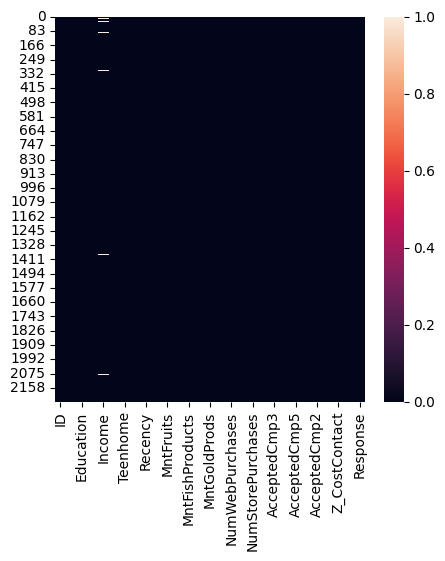

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isna())

In [ ]:
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage (%)': missing_percent
})

missing_summary = missing_summary[missing_summary['Missing Values'] > 0]
missing_summary = missing_summary.sort_values(by='Missing Values', ascending=False)

missing_summary

,Missing Values,Percentage (%)
Income,24,1.071429


Secara garis besar:
- missing value dalam kolom `Income` memiliki proporsi yang cukup kecil (1.07%). 
- setelah melihat sebaran data pada kolom lain, data pelanggan dengan kolom `Income` yang kosong tidak terkonsentrasi dan tidak menunjukkan bias pada segmentasi tertentu atau berkaitan dengan variabel lain. Sehingga dapat disimpulkan hilangnya nilai benar-benar bersifat acak atau Missing Completely at Random (MCAR).

Pada umumnya, terdapat dua pendekatan untuk menangani missing value:
- Mengisi atau mengimputasi data yang hilang. Terdapat beberapa metode yang disarankan seperti mengisi mengisi data yang hilang dengan nilai yang sebenarnya atau dengan nilai yang paling mendekati nilai asli. Namun, pengisian data biasanya lebih disarankan untuk proporsi missing value di atas 5%. Dalam kasus ini, missing value hanya mencapai 1.07%. 
- Menghapus baris atau kolom dengan missing value. Dalam kasus ini, karena nilai kosong bersifat MCAR atau tidak mempengaruhi variabel lain dan memiliki proporsi yang sangat kecil (1.07%) maka masih dianggap aman untuk sepenuhnya menghilangkan baris dengan nilai kosong.

In [ ]:
df = df.dropna(subset=['Income'])

Berikut hasil DataFrame setelah menghilangkan kolom `Income` dengan nilai kosong:

In [ ]:
df.isna().sum()/df.shape[0]*100

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Z_CostContact          0.0
Z_Revenue              0.0
Response               0.0
dtype: float64

## Transformasi Data

 ### Penanganan Anomali

#### Kolom Marital_Status

Seperti yang sudah ditunjukkan sebelumnya, beberapa nilai dalam kolom `Marital_Status` bersifat ambigu karena tidak membantu dalam analisis struktur rumah tangga pelanggan. Nilai-nilai tersebut antara lain:
  - 'Together', seperti 'Married', dapat menandakan pelanggan tinggal bersama orang lain. Bedanya, 'Together' belum tentu menandakan status pernikahan secara resmi. Untuk mempermudah analisis, 'Married' dan 'Together' bisa dilabeli ulang menjadi 'Couple' karena diksi 'Together' cukup merepresentasikan keadaan keduanya.
  - 'Widow', yang menandakan pelanggan pernah menikah namun kini single, 'Alone' yang menandakan pelanggan tidak memiliki pasangan, dapat diklasifikasikan di satu kategori dengan 'Single'
  - Data-data lain yang bermakna ambigu 'Absurd' dan 'YOLO'. Sebelum dihilangkan, kita perlu menganalisis kolom ini secara lebih lanjut untuk melihat sebaran datanya di kolom lain


In [ ]:
df[df['Marital_Status'].isin(['Absurd', 'YOLO'])]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2093,7734,1993,Graduation,Absurd,79244.0,0,0,19-12-2012,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,0,3,11,1
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-10-01 00:00:00,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,3,11,0
2177,492,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,1


Untuk memahami pelanggan dengan status 'YOLO' lebih lanjut, kita perlu memastikan apakah ada kesamaan antara nilai-nilai di kolom lainnya dengan mempertimbangkan kemungkinan diisi oleh orang yang sama karena terdapat kesamaan di beberapa kolom (seperti `Teenhome`, `Education` dan `Year_Birth`). Namun, perlu digaris bawahi bahwa kedua pelanggan tersebut memiliki 'ID' yang berbeda.

In [ ]:
df[df['Marital_Status'] == 'YOLO'][['Income','MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]]

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
2177,48432.0,322,3,50,4,3,42
2202,48432.0,322,3,50,4,3,42


In [ ]:
df[df['Marital_Status'] == 'YOLO'][['NumWebPurchases', 'NumWebPurchases','NumStorePurchases', 'MntSweetProducts', 'NumWebVisitsMonth','NumDealsPurchases'
]]

,NumWebPurchases,NumWebPurchases,NumStorePurchases,MntSweetProducts,NumWebVisitsMonth,NumDealsPurchases
2177,7,7,6,3,8,5
2202,7,7,6,3,8,5


In [ ]:
df[
    df['Marital_Status'] == 'YOLO'
][[
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
    'AcceptedCmp4', 'AcceptedCmp5', 'Response'
]]

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
2177,0,0,0,0,0,0
2202,0,0,0,0,0,1


Melalui tampilan-tampilan di atas, dapat disimpulkan bahwa
- Semua entri di dua baris 'YOLO' di kolom lain sama kecuali pada kolom `ID` dan `AcceptedCmp6`. Karena tidak terdapat informasi lebih lanjut terhadap perbedaan di kolom `ID` dan  `AcceptedCmp6`, diputuskan bahwa animali ini berpotemsi disebabkan oleh kesalahan dalam pengisian data. 
-Dengan demikian, saya memutuskan untuk menghilangkan satu baris dengan nilai 'YOLO', yaitu entri pada baris ke 2177 (dengan nilai [1] pada `AcceptedCmp6`)

In [ ]:
dropYOLO = df[(df['Marital_Status'] == 'YOLO') & (df['Response'] == 0)].index
df.drop(dropYOLO, inplace=True)
df[df['Marital_Status'] == 'YOLO']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2202,11133,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,1


##### Melabeli Ulang 'Widowed', 'Alone' 'Divorced','Absurd' dan 'YOLO' menjadi 'Single'

Selanjutnya, untuk mempermudah analisis, saya memutuskan untuk melabeli ulang 'Divorced', 'Absurd dan YOLO' ke dalam kolom 'Single' 

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace(['Widow', 'Alone','Divorced', 'Absurd', 'YOLO'], 'Single')

##### Melabeli Ulang 'Married' dan 'Together' menjadi 'Couple'

Selanjutnya, untuk mempermudah analisis, saya memutuskan untuk melabeli ulang 'Married' dan 'Together' menjadi 'Couple'

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'Couple')

In [ ]:
df['Marital_Status'].unique()

array(['Single', 'Couple'], dtype=object)

Dengan demikian, anomali pada kolom `Marital_Status` sudah selesai diperbaiki.

## Membuat kolom baru

Untuk semakin mempermudah analisis, saya ingin membuat dua kolom baru yang menjumlahkan data dari kolom-kolom yang saling berkaitan. 

### `Childhome`

Dalam analisis struktur rumah tangga, pelanggan dengan anak dan remaja nilainya bisa ditambahkan agar semua pelanggan dengan keturunan tanpa melihat umur atau kategori anak dan remaja diperhitungkan dalam analisis. Karena itu, kita akan membuat kolom baru bernama `Childhome` yang isinya merupakan hasil penambahan nilai dalam kolom `Kidhome ` dengan `Teenhome`.

In [ ]:
df['Childhome'] = df['Kidhome'] + df['Teenhome']
df[['Childhome', 'Kidhome', 'Teenhome']].head()

,Childhome,Kidhome,Teenhome
0,0,0,0
1,2,1,1
2,0,0,0
3,1,1,0
4,1,1,0


#### HouseholdType

Yang pertama adalah `HouseholdType` untuk melihat tipe struktur rumah tangga berdasarkan jumlah orang dewasa di rumah serta berapa banyak jumlah anak yang menjadi tanggungan rumah tangga apabila ada/ Adapun pengklasifikasiannya sebagai berikut:

1. 'Single_NoChild': Pelanggan yang tidak tinggal bersama pasangan dan tidak memiliki anak (Childhome = 0).
2. 'Single_WithChild': Pelanggan yang tidak tinggal bersama pasangan namun memiliki anak di rumah (Childhome > 0).
3. 'Couple_NoChild': Pelanggan yang tinggal bersama pasangan namun tidak memiliki anak (Childhome = 0).
4. 'Couple_WithChild': Pelanggan yang tinggal bersama pasangan dan memiliki anak di rumah (Childhome > 0).

In [ ]:
def classify_household(row):
    if row['Marital_Status'] == 'Couple':
        if row['Childhome'] == 0:
            return 'Couple_NoChild'
        else:
            return 'Couple_WithChild'
    else:
        if row['Childhome'] == 0:
            return 'Single_NoChild'
        else:
            return 'Single_WithChild'

df['HouseholdType'] = df.apply(classify_household, axis=1)
df[['HouseholdType']].head()

,HouseholdType
0,Single_NoChild
1,Single_WithChild
2,Couple_NoChild
3,Couple_WithChild
4,Couple_WithChild


#### HouseholdSize

Yang kedua adalah `HouseholdSize` untuk melihat ukuran struktur rumah tangga berdasarkan jumlah anak-anak di rumah. Adapun pengklasifikasiannya akan sebagai berikut:

1. 'No Child': Apabila tidak ada anak di rumah ( Childhome = 0 )
2. 'Small Family' : Apabila anak satu atau dua ( Childhome <= 2 )
3. 'Large Family' : Apabila anak lebih dari dua ( Childhome > 2 )

In [ ]:
def household_size(row):
    if row['Childhome'] == 0:
        return 'No Children'
    elif row['Childhome'] <= 2:
        return 'Small Family'
    else:
        return 'Large Family'

df['HouseholdSize'] = df.apply(household_size, axis=1)
df[['HouseholdSize']].head()


,HouseholdSize
0,No Children
1,Small Family
2,No Children
3,Small Family
4,Small Family


#### `TotalSpending`

Kolom kelima yang perlu ditambahkan adalah `TotalSpending` untuk menjumlahkan total belanja pelanggan selama dua tahun berdasarkan pengeluaran mereka di seluruh jenis produk di kolom `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, dan `MntGoldProds`.

In [ ]:
df['TotalSpending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

df[['TotalSpending']].head()

,TotalSpending
0,1617
1,27
2,776
3,53
4,422


#### `TotalAcceptedCmp`

Kolom kelima yang perlu ditambahkan adalah `TotalAcceptedCmp` untuk menjumlahkan total berapa kali tiap pelanggan menerima tawaran dari campaign 1 hingga campaign 6. Hal ini bermanfaat untuk melihat riwayat perilaku pelanggan terhadap campaign yang sudah dijalankan.

#### Merubah nama kolom`Response` menjadi `AcceptedCmp6`

Pertama-tama, kita perlu merubah kolom `Response` menjadi `AcceptedCmp6` untuk mempermudah analisis hasil kampanye dengan asumsi kampanye terbaru adalah kampanye ke-6

In [ ]:
df.rename(columns={'Response': 'AcceptedCmp6'}, inplace=True)

In [ ]:
cmp_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
            'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']
df['TotalAcceptedCmp'] = df[cmp_cols].sum(axis=1)

df[['TotalAcceptedCmp']].head()

,TotalAcceptedCmp
0,1
1,0
2,0
3,0
4,0


## IDENTIFIKASI OUTLIER

Sebelum analisis, saya akan membuat daftar kolom yang akan saya cek outliernya:
- 'Income'
- 'MntWines'
- 'MntFruits'
- 'MntMeatProducts',
- 'MntFishProducts'
- 'MntSweetProducts'
- 'MntGoldProds'
- 'NumDealsPurchases'
- 'TotalSpending'

In [ ]:
column_check = [
    'Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'TotalAcceptedCmp'
]

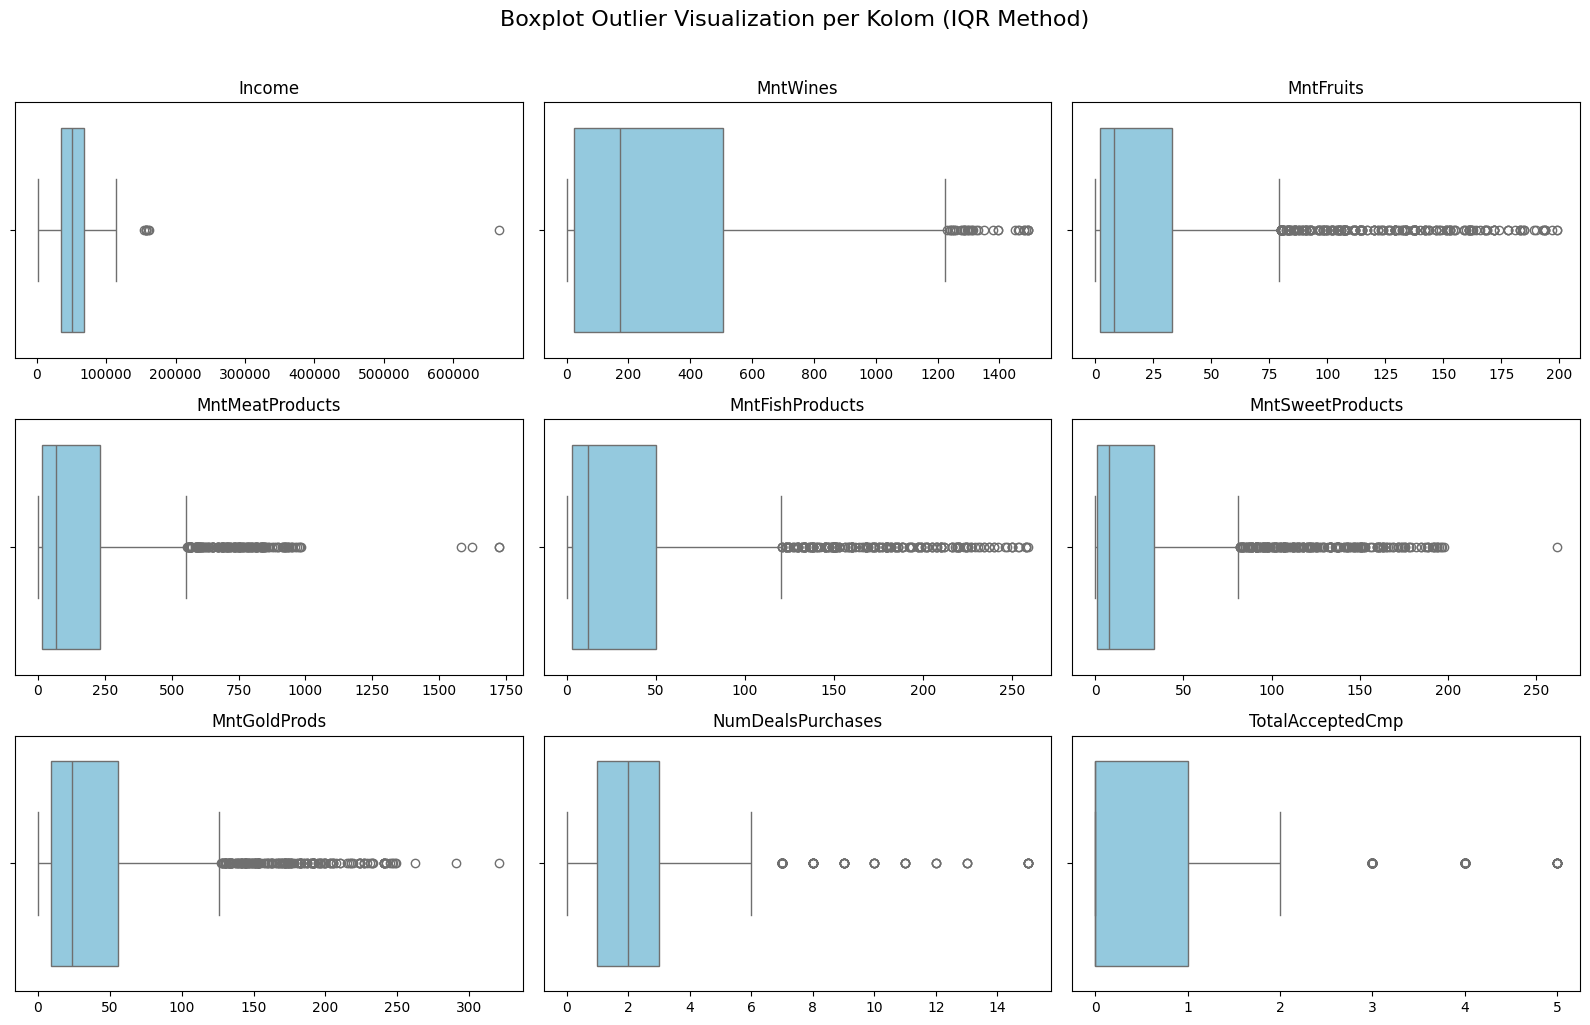

In [ ]:
for col in column_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

plt.figure(figsize=(16, 10))
for i, col in enumerate(column_check, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col)
    plt.xlabel("")
    plt.tight_layout()

plt.suptitle("Boxplot Outlier Visualization per Kolom (IQR Method)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
outlier_summary = []

for col in column_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_count = outliers.shape[0]
    total = df.shape[0]
    percentage = (outlier_count / total) * 100

    if not outliers.empty:
        min_outlier = outliers[col].min()
        max_outlier = outliers[col].max()
    else:
        min_outlier = None
        max_outlier = None

    outlier_summary.append({
        'Column': col,
        'Outlier Count': outlier_count,
        'Total Rows': total,
        'Percentage (%)': round(percentage, 2),
        'Min Outlier': min_outlier,
        'Max Outlier': max_outlier
    })


outlier_df = pd.DataFrame(outlier_summary)
outlier_df.sort_values(by='Percentage (%)', ascending=False, inplace=True)
outlier_df

,Column,Outlier Count,Total Rows,Percentage (%),Min Outlier,Max Outlier
2,MntFruits,246,2215,11.11,80.0,199.0
5,MntSweetProducts,246,2215,11.11,82.0,262.0
4,MntFishProducts,222,2215,10.02,121.0,259.0
6,MntGoldProds,205,2215,9.26,127.0,321.0
3,MntMeatProducts,174,2215,7.86,558.0,1725.0
8,TotalAcceptedCmp,97,2215,4.38,3.0,5.0
7,NumDealsPurchases,84,2215,3.79,7.0,15.0
1,MntWines,35,2215,1.58,1230.0,1493.0
0,Income,8,2215,0.36,153924.0,666666.0


##### Outlier ekstrem pada kolom `Income`

Pada kolom `Income` terdapat nilai outlier yang cukup ekstrim, dengan nilai outlier maksimum pada 666666 dan nilai outlier minimum pada 153924. Apabila tidak ditangani, dapat menimbulkan kebingungan saat analisis. 

Melihat jumlah baris yang sangat sedikit, yaitu 8, saya memutuskan untuk menghilangkan baris pada kolom `Income` yang memiliki outlier.

In [ ]:

for feature in ['Income']:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

print(f"Nilai maksimum Income setelah penghapusan outlier: ${df['Income'].max():,.2f}")

Nilai maksimum Income setelah penghapusan outlier: $113,734.00


##### Outlier pada kolom `NumDealsPurchases`

Untuk saat ini, saya akan menyimpan baris-baris pada kolom `NumDealsPurchases`yang memiliki nilai outlier untuk berjaga-jaga apabila dapat saya gunakan dalam analisis.


#### Outlier pada kolom `TotalAcceptedCmp`

Selanjutnya, kita akan melihat outlier pada kolom `TotalAcceptedCmp` karena jumlah datanya cukup besar, yaitu mencapai 97. Untuk itu, kita akan melihat distribusi datanya menggunakan boxplot dan histogram.

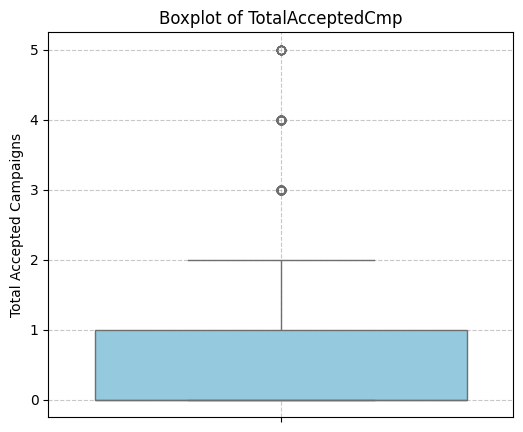

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=df['TotalAcceptedCmp'], color='skyblue')
plt.title('Boxplot of TotalAcceptedCmp')
plt.ylabel('Total Accepted Campaigns')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

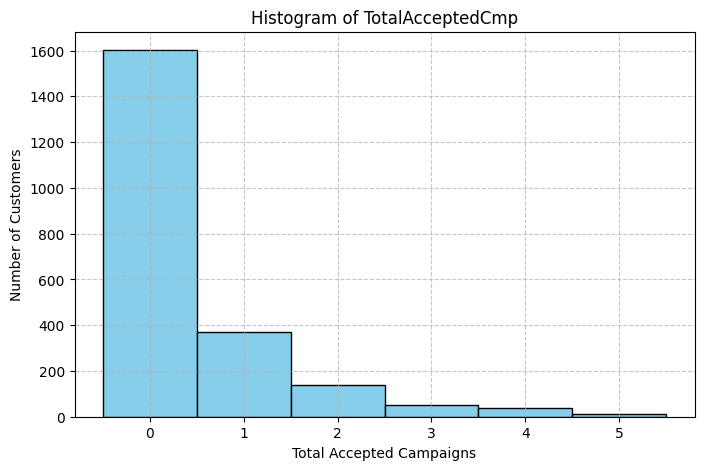

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['TotalAcceptedCmp'], bins=range(df['TotalAcceptedCmp'].max() + 2), color='skyblue', edgecolor='black', align='left')
plt.title('Histogram of TotalAcceptedCmp')
plt.xlabel('Total Accepted Campaigns')
plt.ylabel('Number of Customers')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(df['TotalAcceptedCmp'].max() + 1))
plt.show()

Meskipun menerima tawaran sebanyak 5 kali (nilai ekstrem) selama enam kali kampanye masih dianggap wajar, ada bagusnya juga kita melihat summary untuk nilai maksimal oulier pada kolom `TotalAcceptedCmp`.

In [ ]:
max_outlier = df['TotalAcceptedCmp'].max()

rows_with_max_outlier = df[df['TotalAcceptedCmp'] == max_outlier]

print(f"Nilai maksimum TotalAcceptedCmp: {max_outlier}")
print(f"Jumlah baris dengan TotalAcceptedCmp = {max_outlier}: {len(rows_with_max_outlier)}")

rows_with_max_outlier[['ID']].head()

Nilai maksimum TotalAcceptedCmp: 5
Jumlah baris dengan TotalAcceptedCmp = 5: 10


,ID
252,10089
430,3725
559,3174
824,5536
990,8545


Karena outlier ini masih dalam batas wajar, saya memutuskan untuk menyimpan outlier tersebut.

##### Outlier pada kolom-kolom pengeluaran produk

Selanjutnya, kita perlu melakukan analisis untuk kolom-kolom yang menunjukkan pengeluaran yang dikeluarkan pelanggan untuk beberapa jenis produk. Seperti yang ditampilkan dalam outlier summary, persentase baris-baris outlier ini cukup besar (>1%). Maka, tidak disarankan untuk ditangani dengan cara dihapus. 

Untuk itu, pendekatan yang lebih tepat adalah melakukan transformasi logaritma (log transform) pada kolom-kolom tersebut.  Tujuannya adalah untuk mengurangi pengaruh nilai ekstrem (outlier), sekaligus membuat distribusi data menjadi lebih simetris dan mendekati normal, sehingga lebih cocok untuk analisis statistik dan visualisasi. 


In [ ]:
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

for col in product_cols:
    df[f'log_{col}'] = np.log1p(df[col]).round(2)

Berikut plot setelah dan sebelum melakukan transformasi log pada kolom-kolom produk:

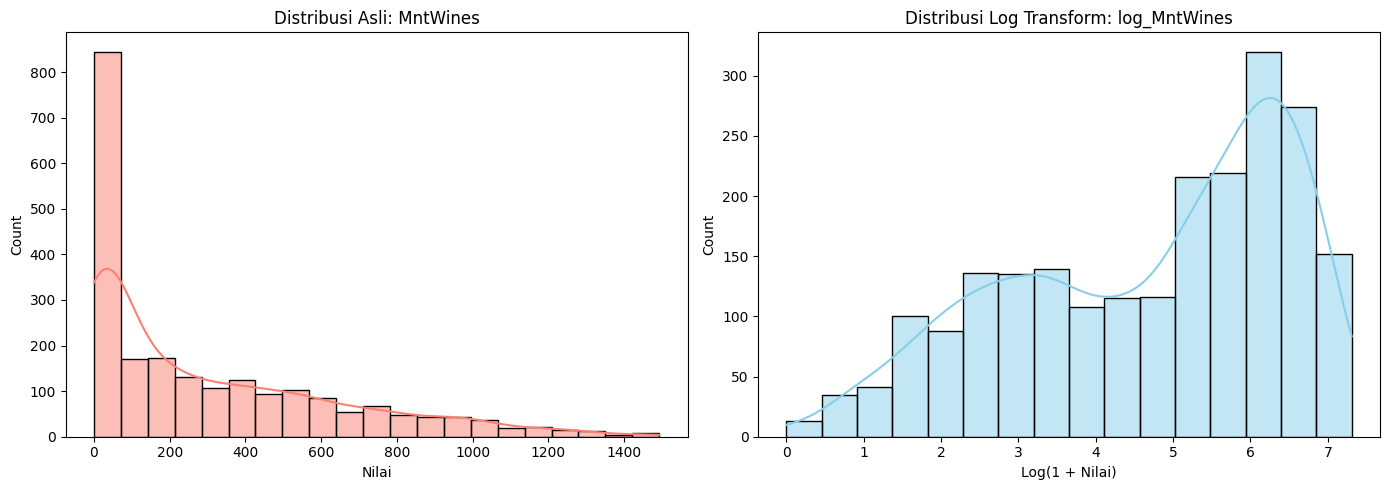

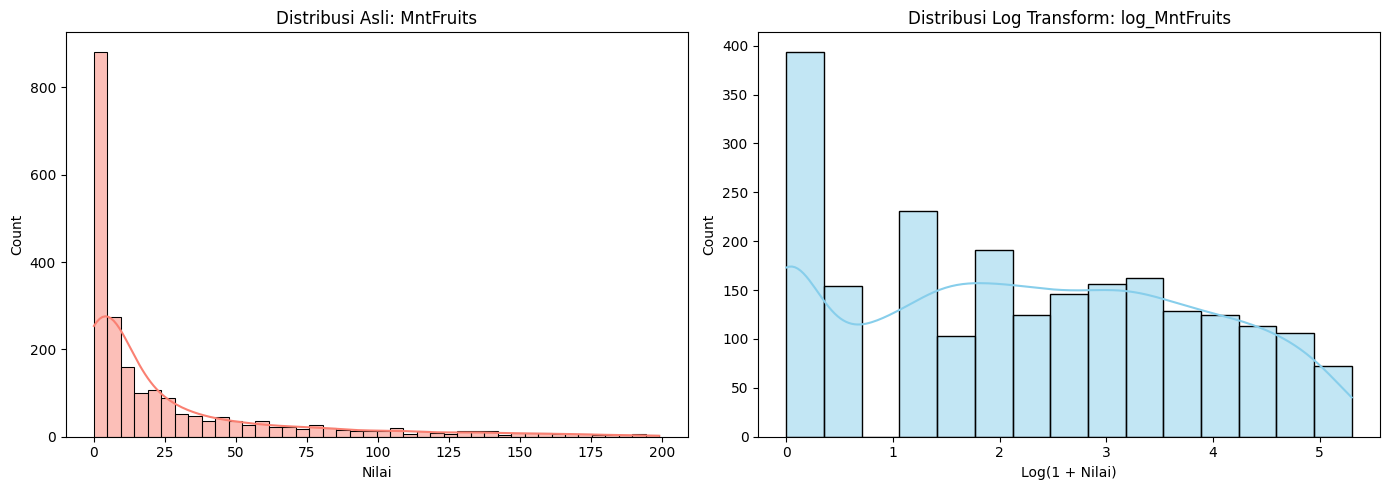

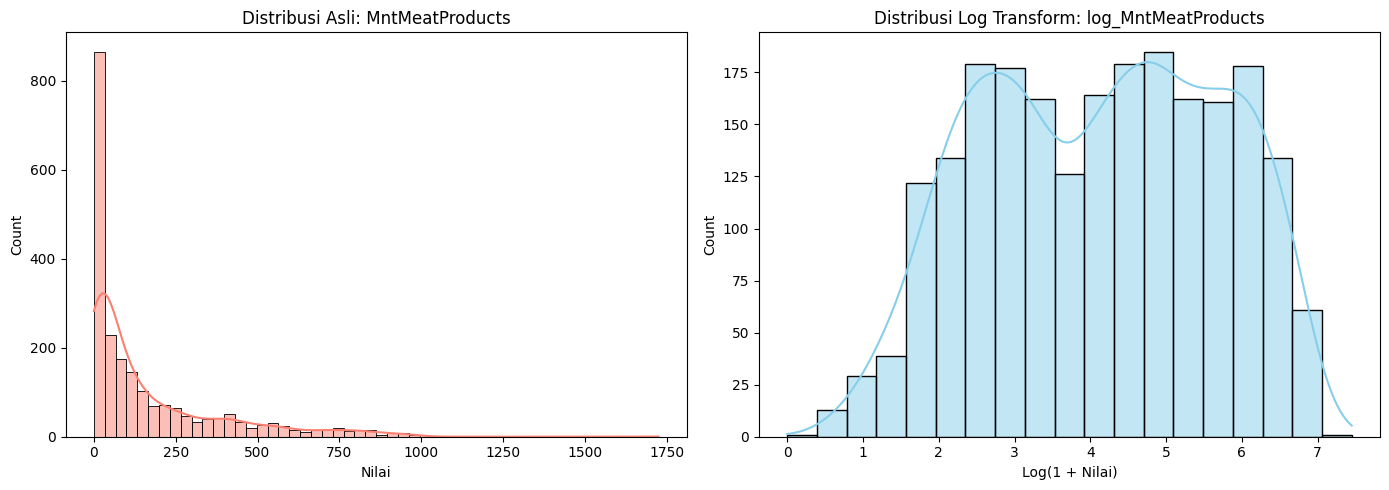

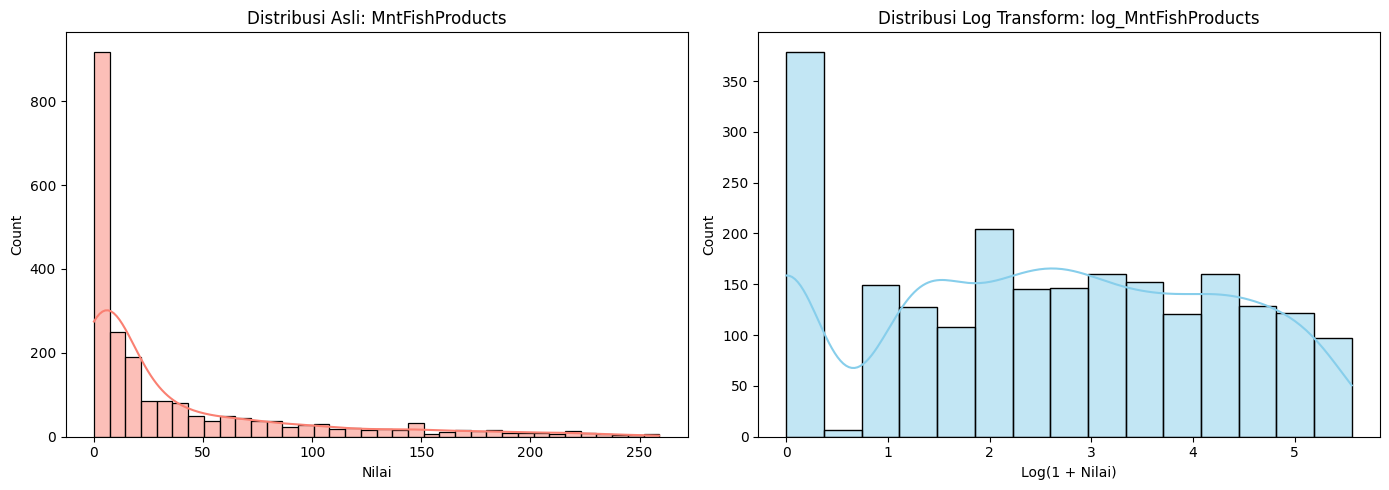

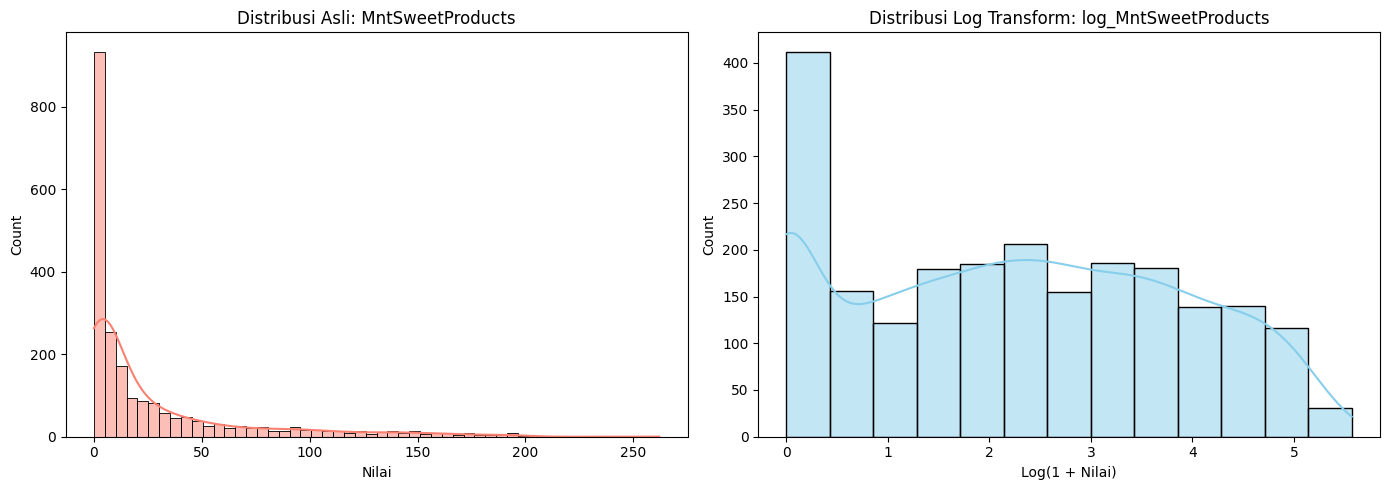

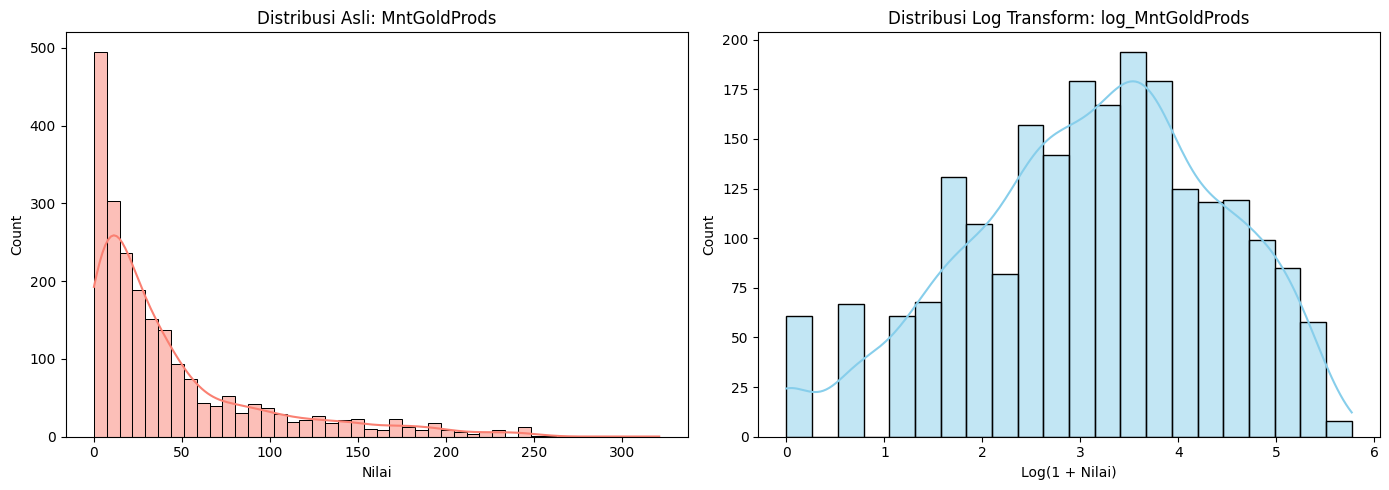

In [ ]:
for col in product_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Plot sebelum log
    sns.histplot(df[col], kde=True, ax=axes[0], color='salmon')
    axes[0].set_title(f'Distribusi Asli: {col}')
    axes[0].set_xlabel('Nilai')

    # Plot sesudah log
    sns.histplot(df[f'log_{col}'], kde=True, ax=axes[1], color='skyblue')
    axes[1].set_title(f'Distribusi Log Transform: log_{col}')
    axes[1].set_xlabel('Log(1 + Nilai)')

    plt.tight_layout()
    plt.show()

#### Outlier pada Kolom `TotalSpending`

Setelah Data Preparation selesai di bagian produk, kita akan melihat bagaimana perubahan tersebut mempengaruhi kolom `TotalSpending` sekaligus melihat apakah muncul outlier pada kolom tersebut.

Agar langsung terlihat, akan digunakan boxplot dan penekanan di Q3 untuk menunjukkan jarak ke outlier ekstrem apabila ada.

Q3 (75th percentile): 1047.50
IQR (Q3 - Q1): 978.50
Batas atas (Upper Bound): 2515.25
Outlier ditentukan sebagai nilai di atas 2515.25, yang jauh melampaui Q3.


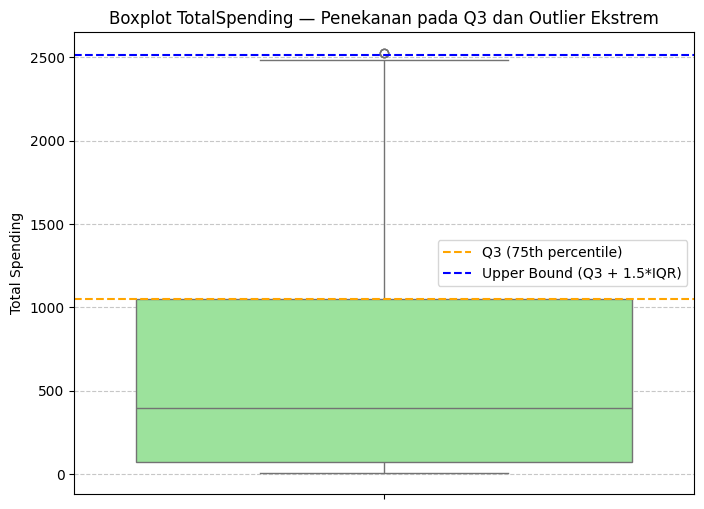


Jumlah outlier ekstrem di atas Q3 + 1.5*IQR: 3
Contoh outlier ekstrem (5 nilai tertinggi):


,TotalSpending
1179,2525
1572,2525
1492,2524


In [ ]:
# Distribusi Data pada TotalSpending

Q1 = df['TotalSpending'].quantile(0.25)
Q3 = df['TotalSpending'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR (Q3 - Q1): {IQR:.2f}")
print(f"Batas atas (Upper Bound): {upper_bound:.2f}")
print(f"Outlier ditentukan sebagai nilai di atas {upper_bound:.2f}, yang jauh melampaui Q3.")

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['TotalSpending'], color='lightgreen')

plt.axhline(Q3, color='orange', linestyle='--', label='Q3 (75th percentile)')
plt.axhline(upper_bound, color='blue', linestyle='--', label='Upper Bound (Q3 + 1.5*IQR)')

plt.title('Boxplot TotalSpending — Penekanan pada Q3 dan Outlier Ekstrem')
plt.ylabel('Total Spending')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

outliers = df[df['TotalSpending'] > upper_bound]

print(f"\nJumlah outlier ekstrem di atas Q3 + 1.5*IQR: {outliers.shape[0]}")
print("Contoh outlier ekstrem (5 nilai tertinggi):")
display(outliers[['TotalSpending']].sort_values(by='TotalSpending', ascending=False))

IQR: 978.50
Batas atas (Upper Bound): 2515.25


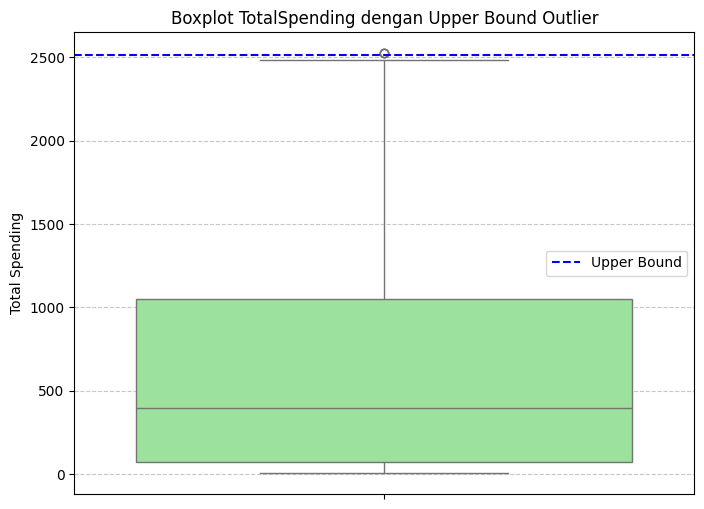


Jumlah outlier ekstrem atas: 3


,TotalSpending
1179,2525
1572,2525
1492,2524


In [ ]:

Q1 = df['TotalSpending'].quantile(0.25)
Q3 = df['TotalSpending'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR:.2f}")
print(f"Batas atas (Upper Bound): {upper_bound:.2f}")

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['TotalSpending'], color='lightgreen')
plt.axhline(upper_bound, color='blue', linestyle='--', label='Upper Bound')
plt.title('Boxplot TotalSpending dengan Upper Bound Outlier')
plt.ylabel('Total Spending')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

outliers = df[df['TotalSpending'] > upper_bound]
print(f"\nJumlah outlier ekstrem atas: {outliers.shape[0]}")
display(outliers[['TotalSpending']].sort_values(by='TotalSpending', ascending=False).head())

##### Penaganan Terhadap Outlier `TotalSpending`

Karena analisis ini berfokus pada segmentasi pelanggan, maka saya memutuskan untuk melakukan drop pada outlier ekstrim tersebut agar tidak terjadi bias saat meneliti kolom ini lebih lanjut.

In [ ]:
df_no_outlier = df[df['TotalSpending'] <= upper_bound]

### Mencari Duplikat

In [ ]:
duplicates = df[df.duplicated()]
duplicates.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,AcceptedCmp6,Childhome,HouseholdType,HouseholdSize,TotalSpending,TotalAcceptedCmp,log_MntWines,log_MntFruits,log_MntMeatProducts,log_MntFishProducts,log_MntSweetProducts,log_MntGoldProds


Hasil di atas menunjukkan bahwa tidak ada duplikat dalam dataset yang perlu ditangani.

### Menanggalkan Kolom yang Tidak Dipakai dalam Analisis

Terakhir, berikut kolom-kolom yang tidak akan dipakai dalam analisis sehingga aman untuk di drop. Di antaranya:
- `Year_Birth`
- `Education`
- 'Dt_Customer
- `Complain`
- `Z_CostContact`
- `Z_Revenue`
- `NumWebPurchases`
- `NumCatalogPurchases`
- `NumStorePurchases`
- `NumWebVisitsMonth`

In [ ]:
df = df.drop(['Year_Birth', 'Education', 'Complain','Z_CostContact', 'Z_Revenue', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth' ], axis=1)
df.head()


,ID,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,Childhome,HouseholdType,HouseholdSize,TotalSpending,TotalAcceptedCmp,log_MntWines,log_MntFruits,log_MntMeatProducts,log_MntFishProducts,log_MntSweetProducts,log_MntGoldProds
0,5524,Single,58138.0,0,0,2012-04-09 00:00:00,58,635,88,546,172,88,88,3,0,0,0,0,0,1,0,Single_NoChild,No Children,1617,1,6.46,4.49,6.30,5.15,4.49,4.49
1,2174,Single,46344.0,1,1,2014-08-03 00:00:00,38,11,1,6,2,1,6,2,0,0,0,0,0,0,2,Single_WithChild,Small Family,27,0,2.48,0.69,1.95,1.10,0.69,1.95
2,4141,Couple,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,0,0,0,0,0,0,0,Couple_NoChild,No Children,776,0,6.06,3.91,4.85,4.72,3.09,3.76
3,6182,Couple,26646.0,1,0,2014-10-02 00:00:00,26,11,4,20,10,3,5,2,0,0,0,0,0,0,1,Couple_WithChild,Small Family,53,0,2.48,1.61,3.04,2.40,1.39,1.79
4,5324,Couple,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,0,0,0,0,0,0,1,Couple_WithChild,Small Family,422,0,5.16,3.78,4.78,3.85,3.33,2.77


# Data Analysis

Setelah tahap data cleaning, selanjutnya kita akan melakukan data analysis untuk memahami **penggunaan diskon berdasarkan kebiasaan belanja segmen pelanggan tertentu**.

## 1. Segmentasi Pelanggan 

### 1.a. Profiling Pelanggan

Sebelum mulai analisis langsung ke segmentasi pelanggan berdasarkan rumah tangga, terdapat beberapa informasi esensial yang perlu diketahui. Seperti total pelanggan sampel yang akan dianalisis dan kelompok pelanggan berdasarkan beberapa variabel.

1. Total Sampel Pelanggan

In [ ]:
total = df.shape[0]
total

2207

Jadi, total pelanggan yang dianalisis sebanyak 2207 pelanggan.

2. Kelompok Sampel Pelanggan berdasarkan Status Pernikahan dan Jumlah Anak

Berdasarkan Keberadaan Pasangan

In [ ]:
Total_byMarr = df['Marital_Status'].value_counts()
Perc_byMarr = (Total_byMarr / len(df)) * 100

print("Jumlah Pelanggan Berdasarkan Keberadaan Pasangan:")
print(Total_byMarr)
print("\nPersentase Pelanggan Berdasarkan Keberadaan Pasangan:")
print(Perc_byMarr)

Jumlah Pelanggan Berdasarkan Keberadaan Pasangan:
Marital_Status
Couple    1423
Single     784
Name: count, dtype: int64

Persentase Pelanggan Berdasarkan Keberadaan Pasangan:
Marital_Status
Couple    64.476665
Single    35.523335
Name: count, dtype: float64


Berdasarkan Keberadaan Anak di Rumah

In [ ]:
Total_byChild = df['Childhome'].apply(lambda x: 'No Children' if x == 0 else 'With Children').value_counts()
Perc_byChild = (Total_byChild / len(df)) * 100

print("Jumlah Pelanggan Berdasarkan Keberadaan Anak:")
print(Total_byChild)
print("\nPersentase Pelanggan Berdasarkan Keberadaan Anak:")
print(Perc_byChild)

Jumlah Pelanggan Berdasarkan Keberadaan Anak:
Childhome
With Children    1578
No Children       629
Name: count, dtype: int64

Persentase Pelanggan Berdasarkan Keberadaan Anak:
Childhome
With Children    71.499773
No Children      28.500227
Name: count, dtype: float64


Dengan informasi awal mengenai **jumlah sampel pelanggan**, **keberadaan pasangan**, dan **keberadaan anak** dalam rumah tangga, kita bisa memulai segmentasi mendalam berdasarkan struktur rumah tangga.

### 1.b Segmentasi Pelanggan berdasarkan Ukuran Rumah Tangga

Elemen paling penting dalam analisis ini adalah **segmentasi pelanggan berdasarkan struktur dan ukuran rumah tangga**. Karena itu, kita akan melakukan plotting untuk:
- `HouseholdType` untuk melihat tipe struktur rumah tangga berdasarkan jumlah orang dewasa di rumah serta berapa banyak jumlah anak yang menjadi tanggungan rumah tangga.
- `HouseholdSize` untuk melihat ukuran struktur rumah tangga berdasarkan jumlah anak-anak di rumah.


#### Visualisasi Data HouseholdType

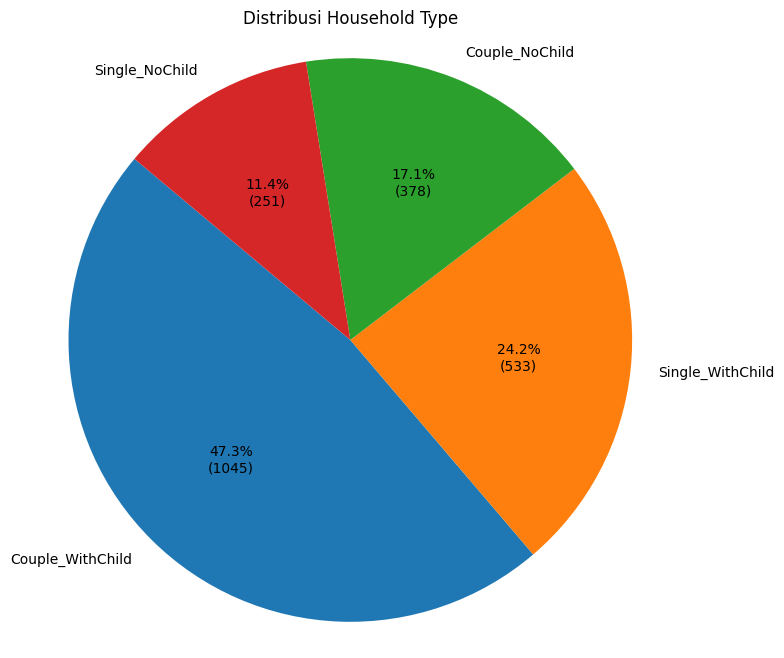

In [ ]:
household_type_counts = df['HouseholdType'].value_counts()

def make_autopct(values):
    def autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count})'
    return autopct

plt.figure(figsize=(8, 8))
plt.pie(household_type_counts, 
        labels=household_type_counts.index, 
        autopct=make_autopct(household_type_counts), 
        startangle=140)
plt.title('Distribusi Household Type')
plt.axis('equal')
plt.show()

Dari visualisasi segmen berdasarkan struktur rumah tangga tersebut, dapat disimpulkan bahwa:
- Segmen pasangan dengan anak **(Couple_WithChild)** memiliki presentase terbanyak, yaitu 47.4% dengan jumlah 1049 orang pelanggan. Karena itu, segmen Couple_WithChild layak untuk dipertimbangkan dalam analisis atau pengambilan keputusan yang berkaitan dengan segmentasi pelanggan.
- Segmen kedua terbesar adalah pelanggan lajang dengan anak **(Single_WithChild)** dengan presentase 24.1% dengan jumlah 533 orang pelanggan. Karena itu, segmen Single_WithChild juga layak untuk dipertimbangkan dalam analisis atau pengambilan keputusan yang berkaitan dengan segmentasi pelanggan.
- Segmen ketiga terbesar adalah pasangan tanpa anak **(Couple_NoChild)** dengan presentase 17.2% dengan jumlah 381 orang pelanggan. 
- Segmen paling sedikit adalah pelanggan lajang tanpa anak **(Single_NoChild)** dengan presentase 11.4% dengan jumlah 252 orang pelanggan. 

### Visualisasi Data HouseholdSize

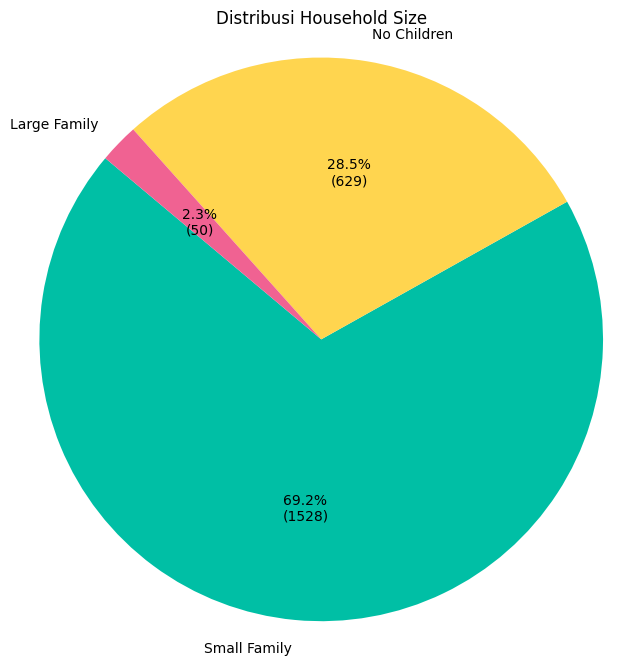

In [ ]:
household_size_counts = df['HouseholdSize'].value_counts()
custom_colors = ['#00BFA5', '#FFD54F', '#F06292']  # teal, yellow, pink

plt.figure(figsize=(8, 8))
plt.pie(household_size_counts, 
        labels=household_size_counts.index, 
        autopct=make_autopct(household_size_counts), 
        startangle=140,
        colors=custom_colors)
plt.title('Distribusi Household Size')
plt.axis('equal')
plt.show()

Berdasarkan diagram di atas, dapat disimpulkan bahwa berdasarkan ukuran rumah tangga:
- Segmen pelanggan terbesar adalah keluarga dengan satu atau dua anak **(Small_Family)**, yaitu 69.2% dengan jumlah 1532 pelanggan. Karena itu, segmen Small Family sangat penting untuk dipertimbangkan dalam pengambilan keputusan atau analisis yang berkaitan dengan ukuran struktur rumah tangga.
- Segmen pelanggan kedua terbesar adalah keluarga tanpa anak **(No Children)** yaitu 28.6% dengan jumlah 633 pelanggan. Segmen No Children sangat mungkin untuk dipertimbangkan dalam pengambilan keputusan atau analisis yang berkaitan dengan struktur rumah tangga.
- Segmen pelanggan paling kecil adalah keluarga dengan lebih dari dua anak  **(Large Children)**, yaitu 2.3% dengan 50 pelanggan.

### Fokus Analisis: Tipe Struktur Rumah Tangga (HouseholdType)

Setelah perbandingan awal, analisis utama difokuskan pada **`HouseholdType`** karena memberikan segmentasi yang lebih tajam dan relevan untuk tujuan campaign targeting. Kolom `HouseholdType` sangat tepat untuk campaign targeting karena dengan jelas membedakan persona pelanggan berdasarkan ada tidaknya anak di rumah dan status hubungan (lajang atau berpasangan), yang sangat berkaitan dengan gaya hidup.

Dengan demikian, targeted campaign yang dihasilkan akan lebih efektif karena menyasar kebutuhan persona pelanggan secara tepat.

## 2. Income dan Spending per HouseholdType dan HouseholdSize

Aspek yang sangat relevan dalam menganalisis segmen pelanggan berdasarkan rumah tangga adalah menganalisis kolom `Income` dan `Spending` untuk mempelajari **daya beli** masing-masing segmen. Hal ini memastikan agar segmen pelanggan yang ditarget dengan diskon atau kampanye akan menghasilkan penjualan secara konsisten. 

Dengan melakukan analisis daya beli. Kita dapat menjawab pertanyaan sebagai berikut:
- Segmen mana yang memiliki pendapatan paling tinggi dan segmen mana yang memiliki pendapatan paling rendah? Apakah segmen dengan pendapatan tertinggi otomatis mendorong pemebelanjaan tertinggi di supermarket?
- Kampanye apa yang cocok terhadap segmen pelanggan berdasarkan daya beli mereka?

### Income per HouseholdType 

Sebelumnya, kita perlu melihat persebaran data dan rata-rata Income pada kolom HouseholdType menggunakan histogram dan bar plot.

#### Distribusi dan Rata-Rata Income per HouseholdType

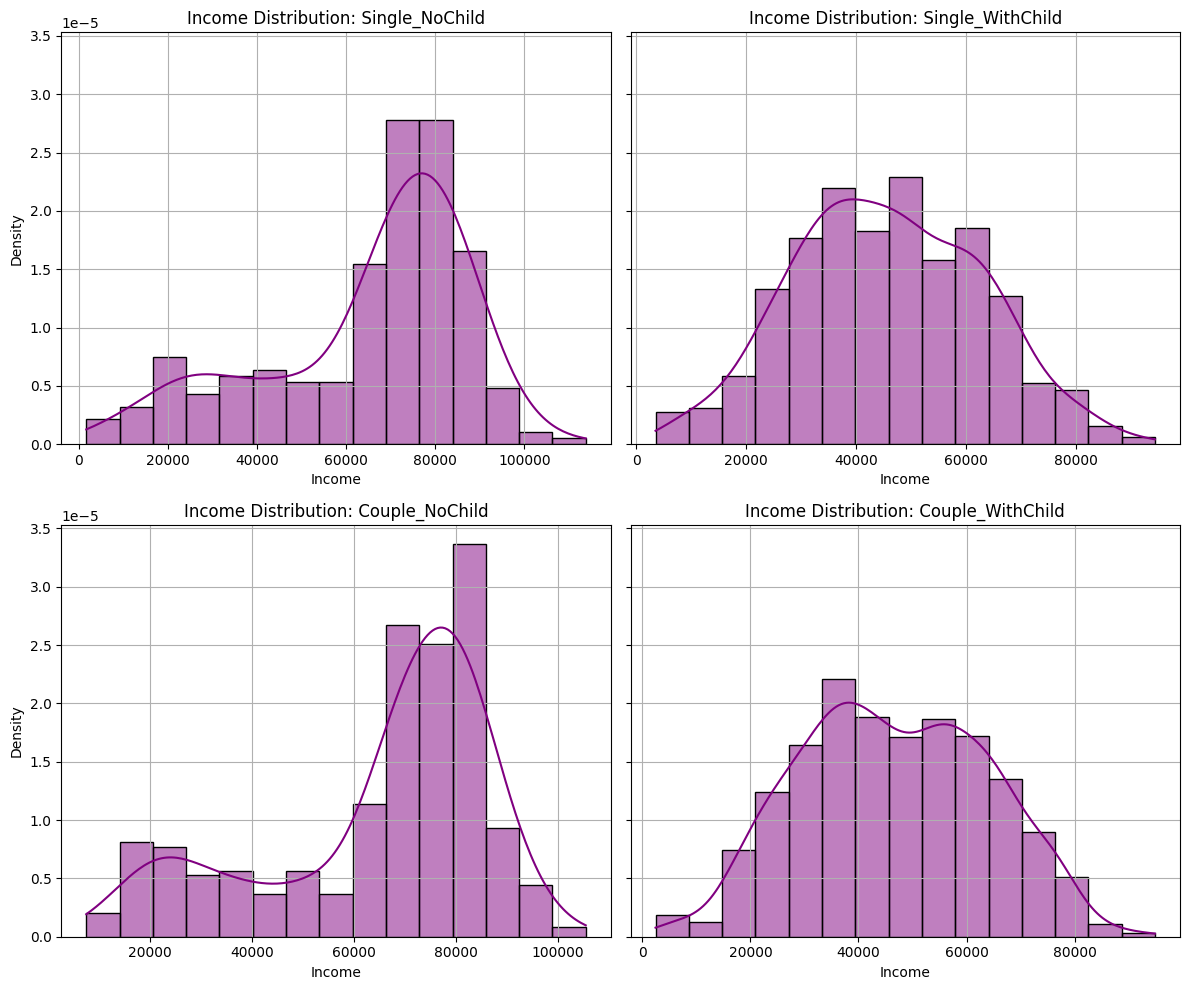

In [ ]:
# Distribusi Income berdasarkan HouseholdType

df['HouseholdType'] = df.apply(
    lambda row: (
        'Single_NoChild' if row['Marital_Status'] == 'Single' and row['Childhome'] == 0 else
        'Single_WithChild' if row['Marital_Status'] == 'Single' and row['Childhome'] > 0 else
        'Couple_NoChild' if row['Marital_Status'] == 'Couple' and row['Childhome'] == 0 else
        'Couple_WithChild'
    ),
    axis=1
)

household_types = ['Single_NoChild', 'Single_WithChild', 'Couple_NoChild', 'Couple_WithChild']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10), sharey=True)

axes = axes.flatten()

for i, ht in enumerate(household_types):
    subset = df[df['HouseholdType'] == ht]
    sns.histplot(subset['Income'], kde=True, stat='density', bins=15, ax=axes[i], color='purple')
    axes[i].set_title(f'Income Distribution: {ht}')
    axes[i].set_xlabel('Income')
    axes[i].set_ylabel('Density')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

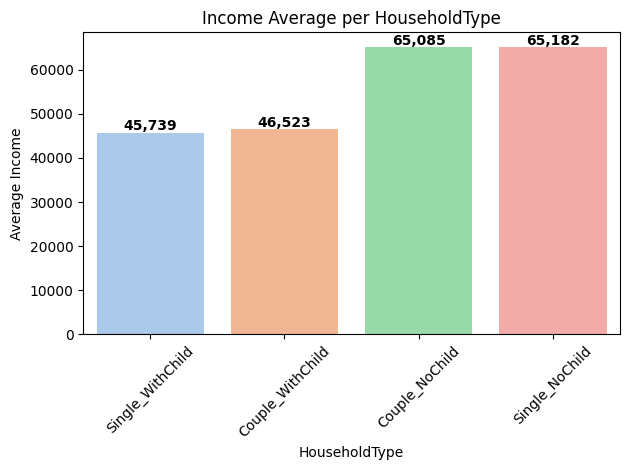

In [ ]:
# Rata-Rata Income per HouseholdType

income_by_type = df.groupby('HouseholdType')['Income'].mean().sort_values()

ax = sns.barplot(x=income_by_type.index, y=income_by_type.values, palette='pastel')
plt.title('Income Average per HouseholdType')
plt.ylabel('Average Income')
plt.xticks(rotation=45)

for i, v in enumerate(income_by_type.values):
    ax.text(i, v + 500, f'{v:,.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


Berdasarkan diagram di atas, dapat disimpulkan bahwa berdasarkan Household Type:

- Segmen **Single_NoChild** dan **Couple_NoChild** merupakan pelanggan dengan rata-rata pendapatan tertinggi, yaitu masing-masing sebesar $65.182 dan $65.085. Keduanya menunjukkan distribusi pendapatan yang lebih condong ke kelompok menengah-atas, dan bisa menjadi target potensial untuk produk dengan harga premium atau strategi upselling.

- Segmen **Couple_WithChild** memiliki rata-rata pendapatan sebesar $46.523, sedangkan **Single_WithChild** memiliki pendapatan paling rendah yaitu $45.739. Hal ini mengindikasikan bahwa segmen keluarga dengan anak cenderung memiliki daya beli yang lebih rendah, sehingga strategi pemasaran seperti penawaran diskon atau produk value-for-money lebih relevan untuk kelompok ini.

#### Tingkatan Income per HouseholdType

Lebih lanjut, kita juga dapat melihat tingkatan Income masing-masing segmen berdasarkan pengelompokkan income mereka. Sebelumnya, kita akan mengelompokkan pendapatan menjadi beberapa tingkatan:
1. **'Low Income'** untuk  income di bawah 30000:
2. **'Lower-Middle'** untuk income  di atas 30000 hingga 60000
3. **'Upper-Middle'** untuk income di atas 60000 hingga 90000
4. **'High Income'** untuk income di atas 90000

Sebelumnya kita dapat melihat persebaran data `Income` terbaru setelah data cleaning yang kita lakukan sebelumnya.

In [ ]:
income_summary = df['Income'].describe()
print(income_summary)

count      2207.000000
mean      51635.088808
std       20717.958589
min        1730.000000
25%       35196.000000
50%       51315.000000
75%       68298.500000
max      113734.000000
Name: Income, dtype: float64


Berdasarkan ringkasan data tersebut kita bisa membuat pengkategorian seperti berikut:

In [ ]:
def classify_income(income):
    if income < 30000:
        return 'Low Income'
    elif income < 60000:
        return 'Lower-Middle'
    elif income < 90000:
        return 'Upper-Middle'
    else:
        return 'High Income'

df['IncomeLevel'] = df['Income'].apply(classify_income)
df[['Income', 'IncomeLevel']].head()

,Income,IncomeLevel
0,58138.0,Lower-Middle
1,46344.0,Lower-Middle
2,71613.0,Upper-Middle
3,26646.0,Low Income
4,58293.0,Lower-Middle


Karena kalkulasi ini penting, mari kita save dulu ke excel asli.

In [ ]:
df.to_excel('updated_file.xlsx', index=False)


Berikutnya, kita akan melihat tingkat pendapatan di setiap segmen pelanggan.

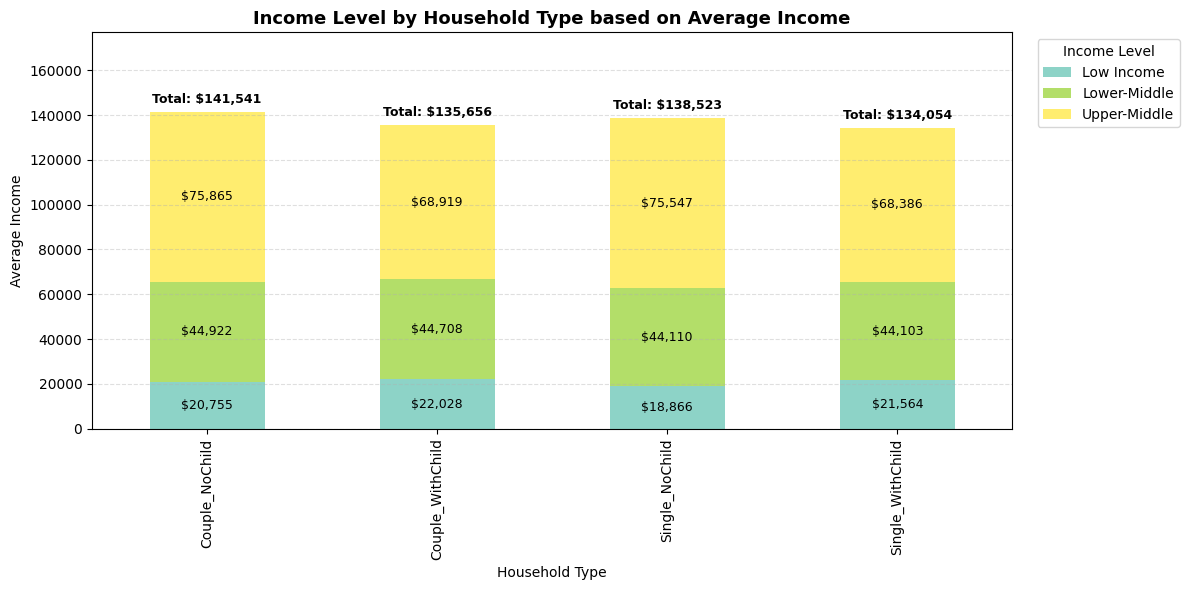

In [ ]:
#Income Level by Household Type

grouped_income = df.groupby(['HouseholdType', 'IncomeLevel'])['Income'].mean().unstack()
grouped_income = grouped_income[['Low Income', 'Lower-Middle', 'Upper-Middle']]

fig, ax = plt.subplots(figsize=(12, 6))
grouped_income.plot(kind='bar', stacked=True, colormap='Set3', ax=ax)

ax.set_title('Income Level by Household Type based on Average Income', fontsize=13, weight='bold')
ax.set_xlabel('Household Type')
ax.set_ylabel('Average Income')
ax.grid(axis='y', linestyle='--', alpha=0.4)
ax.legend(title='Income Level', bbox_to_anchor=(1.02, 1), loc='upper left')

for container in ax.containers:
    labels = [f"${v.get_height():,.0f}" if v.get_height() > 0 else "" for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=9, color='black')

totals = grouped_income.sum(axis=1)


y_max = totals.max() * 1.25 
ax.set_ylim(0, y_max)

for i, total in enumerate(totals):
    ax.text(i, total + (y_max * 0.015), f"Total: ${total:,.0f}",
            ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

Berdasarkan visualisasi pendapatan rata-rata berdasarkan tipe rumah tangga, terdapat beberapa kesimpulan penting yang dapat diambil:

- Segmen Couple_NoChild dan Single_NoChild menunjukkan pendapatan total tertinggi, masing-masing sebesar $141,541 dan $138,523, yang didorong oleh kontribusi signifikan dari kelompok pendapatan Upper-Middle (masing-masing sekitar $75,000). Hal ini mengindikasikan bahwa rumah tangga tanpa anak cenderung memiliki kapasitas pendapatan yang lebih besar.

- Sebaliknya, segmen Couple_WithChild dan Single_WithChild memiliki total pendapatan lebih rendah, yaitu $135,656 dan $134,054. Penurunan ini terutama terlihat pada kelompok pendapatan Upper-Middle, yang lebih rendah dibandingkan segmen tanpa anak (sekitar $68,000).

- Meskipun kontribusi dari kelompok Lower-Middle relatif seragam di keempat segmen (berkisar $44,000), kelompok Low Income justru tampak sedikit lebih tinggi pada segmen dengan anak. Hal ini dapat mencerminkan adanya keterbatasan waktu atau kesempatan kerja akibat tanggung jawab mengasuh anak.

Secara keseluruhan, data ini menguatkan temuan sebelumnya bahwa segmen rumah tangga tanpa anak memiliki daya beli lebih tinggi dan kapasitas pengeluaran yang lebih besar, sejalan dengan struktur pendapatan mereka yang lebih kuat di kelas menengah atas.

### Spending per HouseholdType

Setelah melihat pendapatan, selanjutnya yang dapat kita lakukan adalah menganalisis pengeluaran masing-masing segmen pelanggan. Hal ini dapat kita lihat dari total belanja mereka di seluruh segmen selama dua tahun yang sudah disimpan di kolom `TotalSpending`.

#### Distribusi dan Rata-Rata Spending per HouseholdType

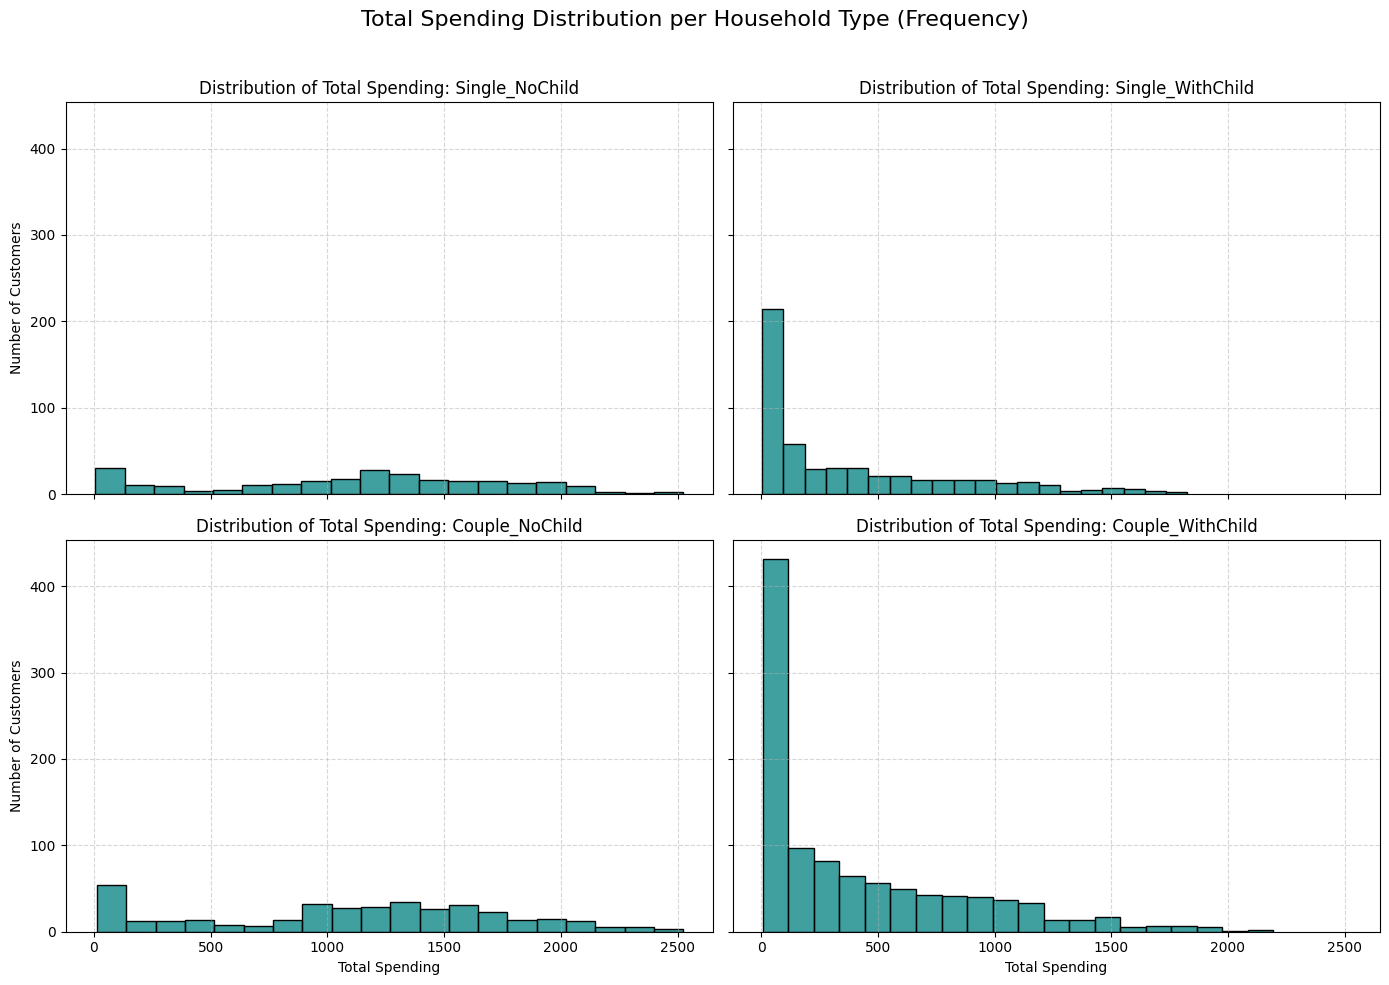

In [ ]:
# Distribusi TotalSpending pada HouseholdType

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, ht in enumerate(household_types):
    subset = df[df['HouseholdType'] == ht]
    sns.histplot(subset['TotalSpending'], stat='count', bins=20,
                 ax=axes[i], color='teal', edgecolor='black')
    axes[i].set_title(f'Distribution of Total Spending: {ht}')
    axes[i].set_xlabel('Total Spending')
    axes[i].set_ylabel('Number of Customers')
    axes[i].grid(True, linestyle='--', alpha=0.5)

plt.suptitle('Total Spending Distribution per Household Type (Frequency)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

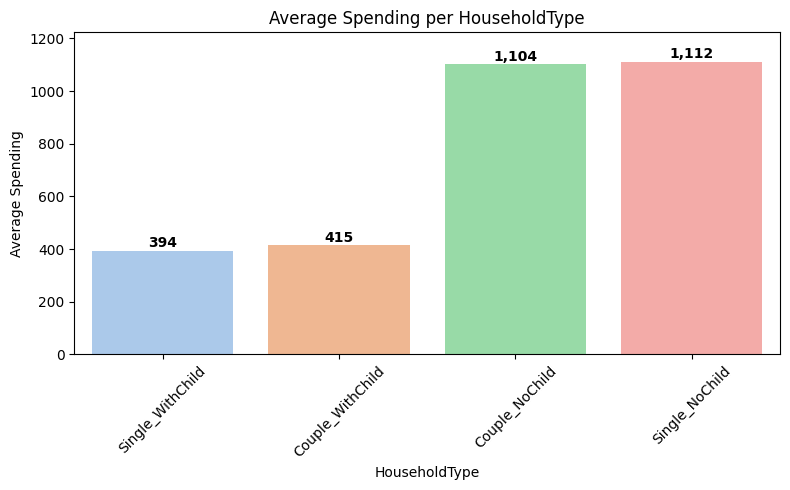

In [ ]:
# Rata-Rata TotalSpending per HouseholdType

income_by_type = df.groupby('HouseholdType')['TotalSpending'].mean().sort_values()


plt.figure(figsize=(8, 5))  # Atur ukuran jika diperlukan
ax = sns.barplot(x=income_by_type.index, y=income_by_type.values, palette='pastel')
plt.title('Average Spending per HouseholdType')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)

y_max = income_by_type.values.max() * 1.10
plt.ylim(0, y_max)

for i, v in enumerate(income_by_type.values):
    ax.text(i, v + y_max * 0.01, f'{v:,.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


Berdasarkan visualisasi di atas, terdapat beberapa insight yang menarik untuk dianalisis. Diantaranya:
- Total pembelanjaan di segmen **Single_WithChild** dan **Couple_WithChild** cenderung lebih rendah, baik dari segi rata-rata maupun distribusi perbelanjaan yang condong ke kiri bahkan mendekati 0 dalam histogram. Hal ini mengindikasikan bahwa keluarga dengan anak-anak memiliki tingkat pengeluaran yang lebih rendah secara umum karena keterbatasan anggaran dan efisiensi dalam penggunaan pendapatan.
- Sebaliknya, di segmen rumah tangga tanpa anak, yaitu **Single_NoChild** dan **Couple_NoChild**, terdapat lebih banyak pelanggan yang berbelanja dalam jumlah sedang hingga tinggi. Hal ini mengindikasikan pelanggan tanpa anak memiliki daya beli lebih tinggi, yang bisa juga didukung oleh tingkat pendapatan (Income) yang lebih tinggi seperti ditemukan dalam analisis sebelumnya.

#### Tingkatan Income per HouseholdType

Lebih lanjut, kita juga dapat melihat tingkatan Income masing-masing segmen berdasarkan pengelompokkan income mereka. Sebelumnya, kita akan mengelompokkan pendapatan menjadi beberapa tingkatan:
1. **'Low Income'** untuk  spending di bawah 635
2. **'Lower-Middle'** untuk spending  di atas 635 hingga 1265
3. **'Upper-Middle'** untuk spending di atas 1265 hingga 1895
4. **'High Income'** untuk spending di atas 1895

Sebelumnya kita dapat melihat persebaran data `TotalSpending` terbaru setelah data cleaning yang kita lakukan sebelumnya.

In [ ]:
spending_summary = df['TotalSpending'].describe()
print(spending_summary)

count    2207.000000
mean      606.958768
std       602.214130
min         5.000000
25%        69.000000
50%       397.000000
75%      1047.500000
max      2525.000000
Name: TotalSpending, dtype: float64


Berdasarkan ringkasan data tersebut kita bisa membuat pengkategorian seperti berikut:

In [ ]:
def classify_spending(spending):
    if spending < 635:
        return 'Low Spending'
    elif spending < 1265:
        return 'Lower-Middle Spending'
    elif spending < 1895:
        return 'Upper-Middle Spending'
    else:
        return 'High Spending'

df['SpendingLevel'] = df['TotalSpending'].apply(classify_spending)
df[['TotalSpending', 'SpendingLevel']].head()

,TotalSpending,SpendingLevel
0,1617,Upper-Middle Spending
1,27,Low Spending
2,776,Lower-Middle Spending
3,53,Low Spending
4,422,Low Spending


Karena kalkulasi ini penting, mari kita save dulu ke excel asli.

In [ ]:
df.to_excel('updated_file.xlsx', index=False)


Berikutnya, kita akan melihat tingkat pengeluaran di setiap segmen pelanggan.

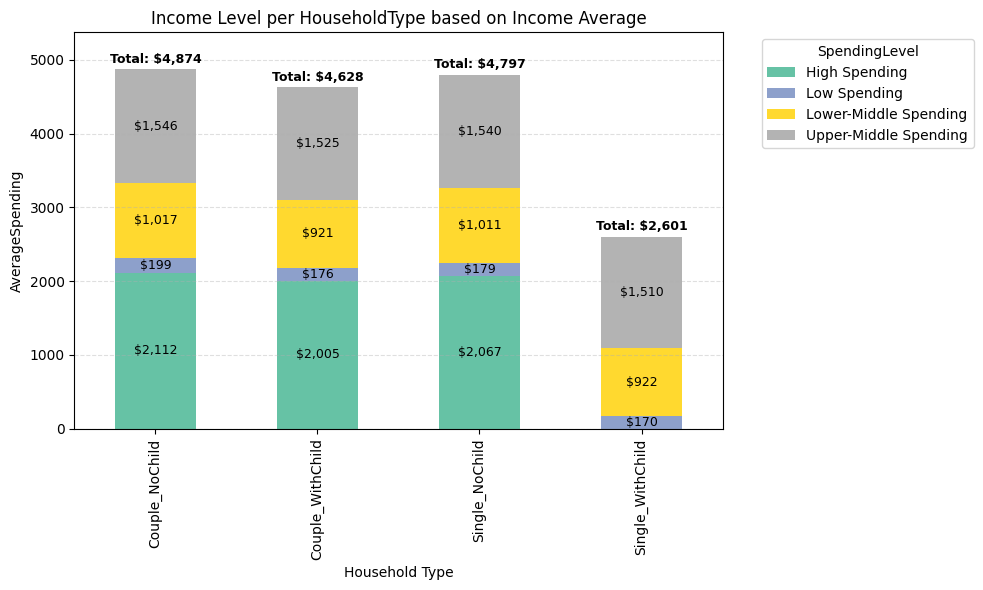

In [ ]:
# Spending Level by HouseholdType
grouped_spending = df.groupby(['HouseholdType', 'SpendingLevel'])['TotalSpending'].mean().unstack()
ax = grouped_spending.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')

plt.title('Spending Level per HouseholdType based on Income Average')
plt.xlabel('Household Type')
plt.ylabel('AverageSpending')
plt.legend(title='SpendingLevel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

for container in ax.containers:
    labels = [f"${v.get_height():,.0f}" if v.get_height() > 0 else "" for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=9, color='black')

totals = grouped_spending.sum(axis=1)  

for i, total in enumerate(totals):
    ax.text(i, total + 50, f"Total: ${total:,.0f}", ha='center', va='bottom', fontsize=9, fontweight='bold')

y_max = totals.max() + 500
ax.set_ylim(0, y_max)

plt.show()

Berdasarkan visualisasi pengeluaran rata-rata berdasarkan tipe rumah tangga, berikut beberapa kesimpulan yang dapat diambil:

- Segmen Couple_NoChild dan Single_NoChild mencatat total pengeluaran tertinggi, masing-masing sebesar $4,874 dan $4,797. Nilai ini menunjukkan bahwa rumah tangga tanpa anak memiliki kapasitas konsumsi yang lebih besar, terutama didorong oleh kategori High Spending dan Upper-Middle Spending.

- Segmen Couple_WithChild juga memiliki pengeluaran yang cukup tinggi ($4,628), meskipun sedikit lebih rendah dibandingkan segmen tanpa anak. Namun, kontribusi kategori High Spending masih cukup signifikan, menunjukkan perilaku konsumsi yang moderat namun stabil.

- Sebaliknya, segmen Single_WithChild memperlihatkan total pengeluaran paling rendah yaitu $2,601, hanya sekitar setengah dari pengeluaran rumah tangga lainnya. Hal ini konsisten dengan temuan sebelumnya bahwa kelompok ini memiliki keterbatasan pendapatan dan cenderung lebih hemat dalam pengeluaran, terutama pada kategori High Spending dan Low Spending yang nilainya paling rendah di antara semua segmen.

Pola ini memperkuat argumen bahwa segmen tanpa anak memiliki daya beli yang lebih tinggi dan fleksibilitas konsumsi yang lebih besar, sedangkan segmen dengan anak, khususnya Single_WithChild, cenderung menjalankan pola konsumsi yang lebih hemat karena keterbatasan pendapatan dan kemungkinan beban pengeluaran rumah tangga lainnya.

Dengan demikian kita bisa menjawab pertanyaan yang kita ajukan di awal analisis Income dan Spending:

Berdasarkan daya beli :
- Segmen tanpa anak, yaitu **Single_NoChild** dan **Couple_NoChild** memiliki pendapatan tertinggi dengan rata-rata sekitar $65,000 sementara segmen dengan anak memiliki pendapatan yang lebih rendah, dengan **Couple_WithChild** mencapai pendapatan sebesar $46,523 dan **Single_WithChild** dengan $45,739. 
- Sejalan dengan hasil yang ditunjukkan analisis pendapatan, pelanggan segmen **Single_NoChild** dan **Couple_NoChild**, jumlah yang sedang hingga tinggi (dengan rata-rata masing-masing $1,112 dan $1,104 dollar). Sebaliknya, segmen **Single_WithChild** dan **Couple_WithChild** pembelanjaannya setengah kali lebih rendah dengan rata-rata pembelanjaan masing-masing $394 dan $415. 

#### Kesimpulan

Dengan demikian, segmen tanpa anak **Single_NoChild** dan **Couple_NoChild** memiliki daya beli terkuat di antara segmen-segmen pelanggan Supermarket

Berdasarkan rekomendasi tipe kampanye:
- Segmen tanpa anak, yaitu (**Single_NoChild** dan **Couple_NoChild**) bisa menjadi target potensial untuk produk dengan harga premium atau strategi upselling. Bahkan, strategi upselling dapat diarahkan ke produk yang paling banyak dibelanjakan oleh kedua segmen tersebut. Misalnya, Couple Deals untuk Couple_NoChild.
- Segmen keluarga dengan anak (**Single_WithChild dan Couple_WithChild**) cenderung memiliki daya beli yang lebih rendah, sehingga strategi pemasaran seperti penawaran diskon atau produk value-for-money lebih relevan untuk kelompok ini. Misalnya, diskon bundling seperti Buy 1 Get 1 atau Buy 2 Get 3 untuk produk populer di kedua segmen ini.

## 3. Penggunaan Diskon tiap Segmen Pelanggan

Setelah kita melihat kebiasaan belanja pada setiap segmen, selanjutnya kita melihat kebiasaan masing-masing segmen pelanggan dalam penggunaan diskon.

Kita akan menggunakan **rata-rata jumlah pembelian dengan diskon** agar kita dapat membandingkan perilaku individu dalam memanfaatkan diskon antar segmen rumah tangga. Penggunaan rata-rata memungkinkan kita melihat seberapa sering pelanggan dalam tiap segmen biasanya membeli produk dengan diskon, tanpa dipengaruhi oleh ukuran atau jumlah anggota dalam segmen tersebut, sehingga hasilnya lebih representatif untuk memahami kecenderungan penggunaan diskon.

### Rata-Rata Jumlah Pembelian dengan Diskon per HouseholdType

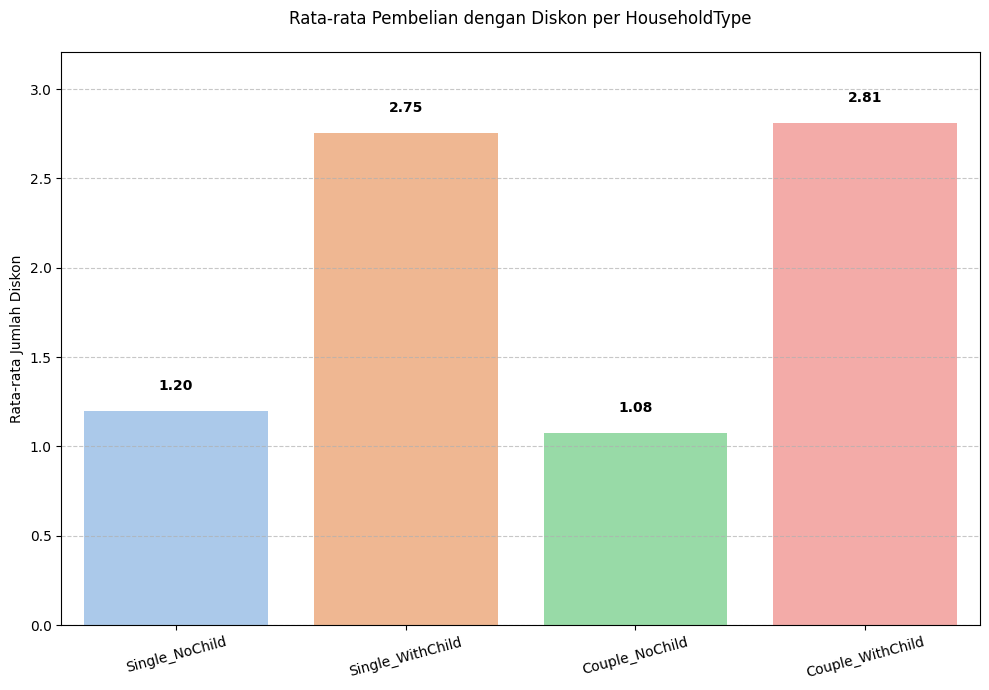

In [ ]:
#Diagram Diskon vs HouseholdType

plt.figure(figsize=(10, 7))
ax = sns.barplot(
    data=df,
    x='HouseholdType',
    y='NumDealsPurchases',
    estimator='mean',
    ci=None,
    palette='pastel'
)

for p in ax.patches:
    height = p.get_height()
    label = f"{height:.2f}"  
    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., height + 0.1),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.yaxis.grid(True, linestyle='--', alpha=0.7)

y_max = max([p.get_height() for p in ax.patches]) + 0.4
plt.ylim(0, y_max)

plt.title('Rata-rata Pembelian dengan Diskon per HouseholdType', pad=20)
plt.ylabel('Rata-rata Jumlah Diskon')
plt.xlabel('')
plt.xticks(rotation=15)  
plt.tight_layout()
plt.show()

In [ ]:
print(df.groupby('HouseholdType')['NumDealsPurchases'].agg(['count', 'mean']))


                  count      mean
HouseholdType                    
Couple_NoChild      378  1.076720
Couple_WithChild   1045  2.808612
Single_NoChild      251  1.199203
Single_WithChild    533  2.752345


Kesimpulan yang didapat dari diagram di atas adalah:
- Bila dilihat dari tipe rumah tangga, **Couple_WithChild** dan **Single_WithChild** adalah kelompok dengan rata-rata penggunaan diskon tertinggi (2.8 dan 2.75), sementara **Couple_NoChild** dan **Single_NoChild** adalah yang paling rendah (sekitar 1). 
- Ini mengindikasikan bahwa keberadaan anak dalam rumah tangga berkontribusi signifikan terhadap sensitivitas terhadap diskon, terlepas dari status pernikahan. Pelanggan dengan anak tampaknya lebih responsif terhadap promosi sebagai strategi untuk mengelola kebutuhan belanja yang lebih besar.

##### Analisis Tambahan: Pengaruh Income terhadap Penggunaan Diskon

Aspek yang juga menarik untuk diperhatikan adalah pengaruh pendapatan rumah tangga dengan pendapatan diskon. Berdasarkan apa yang sudah kita dapatkan di bagian Income, kita dapat membuat beberapa asumsi
- Beberapa tipe struktur rumah tangga dengan income lebih kecil seperti **Couple_WithChild** dan **Single_WitchChild**  akan memeiliki kecenderungan lebih tinggi dalam menggunakan diskon. 
- Hal yang sama juga bisa berlaku dengan ukuran rumah tangga **Small Family** (anak ≤ 2) dan **Large Family (anak > 2)** karena income yang lebih kecil.

Selanjutnya, kita bisa membuat kategori `Income` terhadap penerimaan diskon.

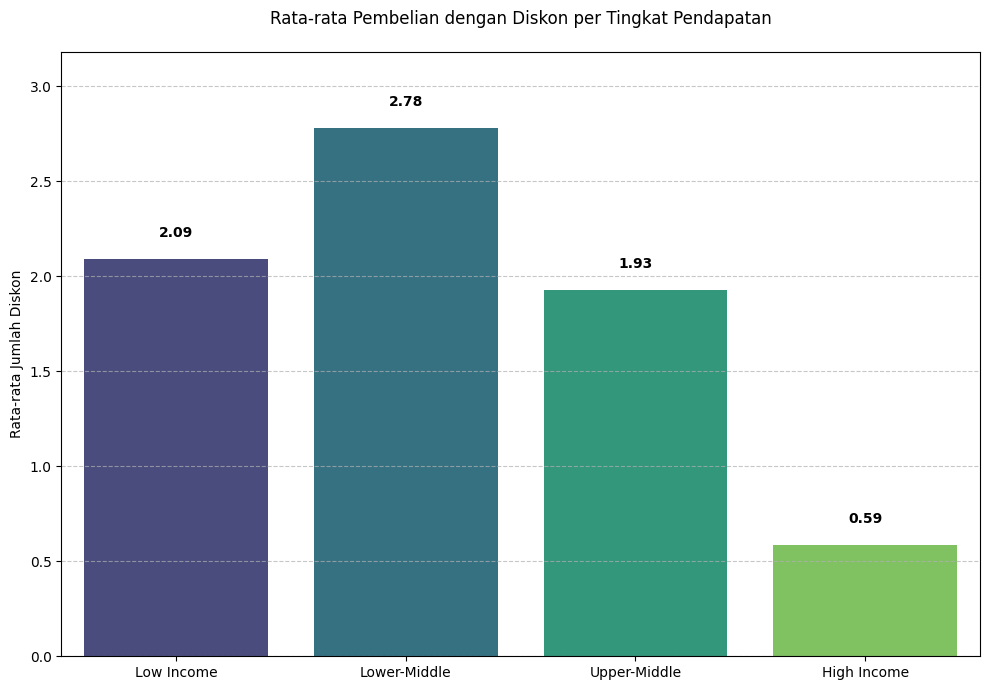

In [ ]:
# Respons terhadap Diskon berdasarkan Income
order = ['Low Income', 'Lower-Middle', 'Upper-Middle', 'High Income']

plt.figure(figsize=(10, 7))
ax = sns.barplot(
    data=df,
    x='IncomeLevel',
    y='NumDealsPurchases',
    estimator='mean',
    ci=None,
    order=order,
    palette='viridis'  
)


for p in ax.patches:
    height = p.get_height()
    label = f"{height:.2f}"
    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., height + 0.1),
                ha='center', va='bottom', fontsize=10, fontweight='bold')


ax.yaxis.grid(True, linestyle='--', alpha=0.7)
y_max = max([p.get_height() for p in ax.patches]) + 0.4
plt.ylim(0, y_max)

plt.title('Rata-rata Pembelian dengan Diskon per Tingkat Pendapatan', pad=20)
plt.ylabel('Rata-rata Jumlah Diskon')
plt.xlabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Kesimpulan yang didapat dari diagram di atas adalah:
- Kelompok Lower-Middle Income memiliki rata-rata pembelian diskon tertinggi (2.78)
- Kedua disusul oleh Low Income (2.09) dan Upper-Middle Income (1.93). 
- Sementara itu, High Income menunjukkan penggunaan diskon yang paling rendah (0.59).

Hasil ini sejalan dengan asumsi bahwa: 
- Tipe struktur rumah tangga seperti **Couple_WithChild** dan **Single_WithChild**, yang umumnya berada dalam kategori pendapatan rendah hingga menengah, memiliki kecenderungan lebih tinggi dalam memanfaatkan program diskon sebagai bagian dari strategi penghematan.

Temuan ini mengindikasikan bahwa pendapatan merupakan faktor penting dalam respons terhadap penawaran diskon, di mana segmen dengan pendapatan menengah ke bawah lebih sensitif dan cenderung memanfaatkan diskon lebih sering dibandingkan kelompok berpenghasilan tinggi. Hal ini mendukung rekomendasi kampanye value-for-money yang telah disebutkan di bagian analisis daya beli sebelumnya.


### 4. Perilaku Penerimaan Penawaran pada Setiap Segmen Pelanggan

Berikutnya, kita dapat melihat perilaku setiap segmen pelanggan berdasarkan struktur dan ukuran rumah tangganya terhadap penerimaan tawaran saat dilakukan campaign. Hal ini bermanfaat apabila kita berniat menargetkan kampanye pada segmen tertentu yang memiliki kemungkinan paling banyak untuk menerima tawaran saat ada campaign.

Sebelumnya, kita perlu membuat kolom yang berisi jumlah total penerimaan tawaran selama campaign 1 hingga 6 berlangsung. Kolom tersebut akan kita beri nama `TotalAcceptedCmp`

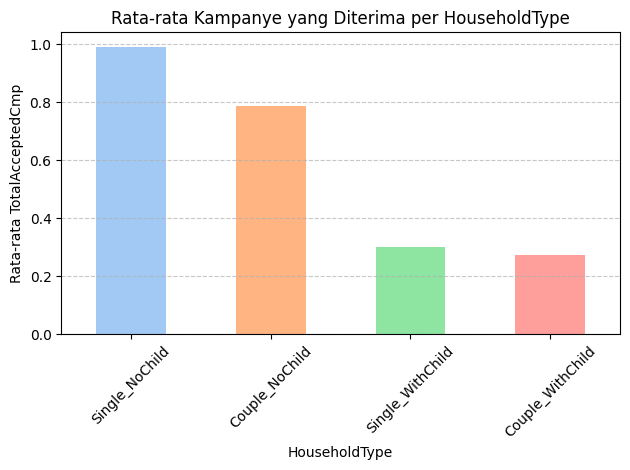

In [ ]:
# Rata-Rata TotalAcceptedCmp per HouseholdType

import seaborn as sns
import matplotlib.pyplot as plt

avg_cmp_type = df.groupby('HouseholdType')['TotalAcceptedCmp'].mean().sort_values(ascending=False)

colors = sns.color_palette("pastel", len(avg_cmp_type))

avg_cmp_type.plot(kind='bar', color=colors)
plt.title('Rata-rata Kampanye yang Diterima per HouseholdType')
plt.ylabel('Rata-rata TotalAcceptedCmp')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Kesimpulan yang didapat dari diagram di atas adalah:

- **Single_NoChild** merupakan segmen dengan rata-rata penerimaan kampanye tertinggi, diikuti oleh Couple_NoChild.

- Sebaliknya, **Single_WithChild** dan **Couple_WithChild** merupakan segmen dengan penerimaan kampanye terendah.

Hal ini menunjukkan bahwa pelanggan tanpa anak lebih responsif terhadap kampanye pemasaran dibandingkan dengan pelanggan yang memiliki anak.

#### Analisis Lanjutan: Pengaruh Penerimaan Kampanye terhadap Total Pembelanjaan per Segmen

Kampanye yang dilakukan dari kampanye pertama hingga keenam bertujuan untuk memaksimalkan hasil penjualan. Berdasarkan analisis yang baru saja dilakukan, beberapa segmen pelanggan sangat responsif terhadap kampanye. Namun, apakah **penerimaan kampanye tersebut berujung pada pembelian yang lebih besar?**

Karena itu, tidak ada salahnya menganalisis TotalSpending berdasarkan struktur dan ukuran rumah tangga yang sudah kita pelajari perilaku penerimaan kampanyenya. Dengan analisis ini, kita berusaha membuktikan:
- segmen yang paling responsif terhadap kampanye juga benar-benar membelanjakan lebih banyak uang

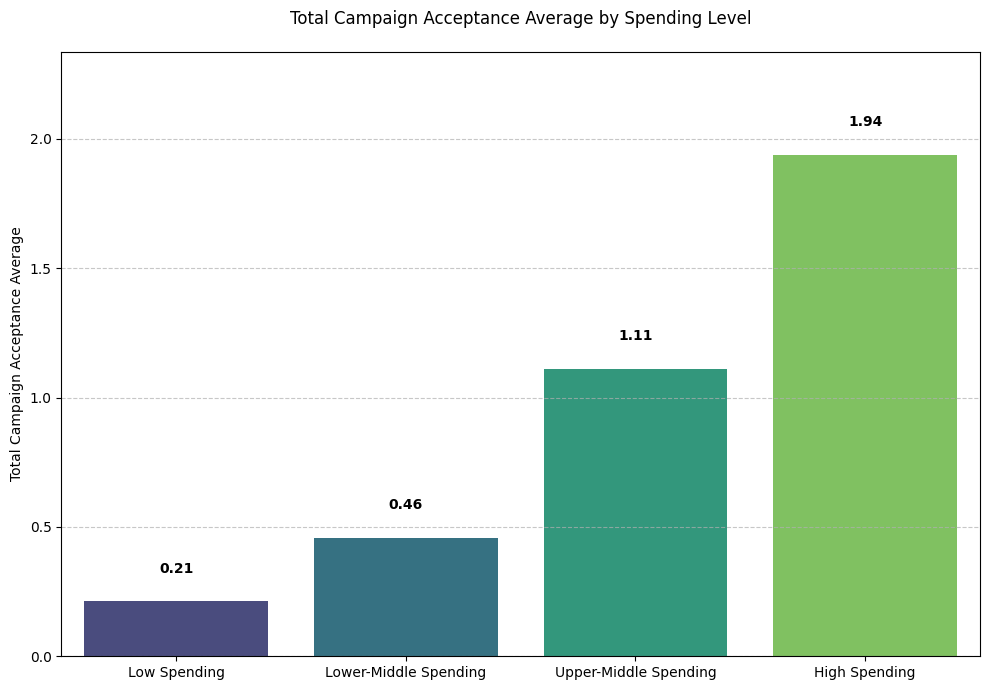

In [ ]:
# Respons terhadap Diskon berdasarkan Income
order = ['Low Spending', 'Lower-Middle Spending', 'Upper-Middle Spending', 'High Spending']

plt.figure(figsize=(10, 7))
ax = sns.barplot(
    data=df,
    x='SpendingLevel',
    y='TotalAcceptedCmp',
    estimator='mean',
    ci=None,
    order=order,
    palette='viridis'  
)

for p in ax.patches:
    height = p.get_height()
    label = f"{height:.2f}"
    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., height + 0.1),
                ha='center', va='bottom', fontsize=10, fontweight='bold')


ax.yaxis.grid(True, linestyle='--', alpha=0.7)
y_max = max([p.get_height() for p in ax.patches]) + 0.4
plt.ylim(0, y_max)

plt.title('Total Campaign Acceptance Average by Spending Level', pad=20)
plt.ylabel('Total Campaign Acceptance Average')
plt.xlabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Berdasarkan HouseholdType:
- Dua segmen yang paling responsif terhadap campaign, **Couple_NoChild** dan **Single_NoChild**, mempunyai daya beli yang tinggi, yaitu dengan rata-rata $11507.44 untuk Couple_NoChild dan $1377.17 untuk Single_NoChild. Hal ini juga didukung dengan pendapatan kadua segmen ini yang lebih tinggi dibanding dua segmen lainnya.
- Dua segmen yang terdiri dari rumah tangga dengan anak, **Couple_WithChild** dan **Single_WithChild** mempunyai respons terhadap paling rendah. Daya beli mereka juga cukup rendah bahkan hampir setengah segmen rumah tangga tanpa anak, dengan $648.65 untuk Couple_WithChild dan $528.74 untuk Single_WithChild. Hal ini mengindikasikan pengalokasian biaya yang lebih terbatas untuk belanja.

Temuan ini menguatkan bahwa pelanggan tanpa anak (**Couple_NoChild** dan **Single_NoChild**) lebih cenderung menerima kampanye sekaligus berbelanja lebih besar. Dengan demikian, kampanye yang dilakukan secara aktif dan konsisten dapat mendukung penawaran yang direkomendasikan sebelumnya seperti promosi untuk produk dengan harga premium dan strategi upselling.

## 5. Perilaku Konsumsi Produk berdasarkan Segmen Pelanggan

Kita telah menganalisis segmen-segmen pelanggan supermarket berdasarkan daya beli serta penerimaan terhadap kampanye dan diskon. Selanjutnya, kita perlu menganalisis produk mana saja yang dibeli oleh segmen-segmen ini untuk mempelajari jenis-jenis produk mana yang paling efektif untuk dimasukkan dalam kampanye atau diberi diskon. 

Dengan menganalisis kebiasaan belanja tiap produk, kita dapat membuktikan atau menolak beberapa asumsi seperti:
- Pada ukuran rumah tangga lebih besar, jumlah biaya yang akan dikeluarkan untuk bahan pokok untuk memasak seperti `MntMeatProducts` dan `MntFishProducts` akan lebih besar.
- Pada struktur rumah tangga dengan anak, akan ada pengalokasian biaya lebih banyak untuk `MntSweetProducts`
- Pada struktur rumah tangga tanpa anak, akan ada pengalokasian biaya lebih besar untuk `MntWines` atau `MntGoldProds`. 

Untuk analisis pada bagian ini, akan digunakan **Rata-rata pengeluaran** untuk tiap jenis produk agar kita dapat membandingkan kebiasaan belanja per individu dalam setiap segmen rumah tangga secara adil, tanpa dipengaruhi oleh perbedaan jumlah anggota di tiap kelompok. Dengan menggunakan rata-rata, kita bisa melihat seberapa besar pelanggan dalam segmen tertentu biasanya mengalokasikan pengeluaran untuk setiap jenis produk, sehingga lebih representatif untuk analisis perilaku belanja.

#### Rata-Rata Pengeluaran Produk per HouseholdType

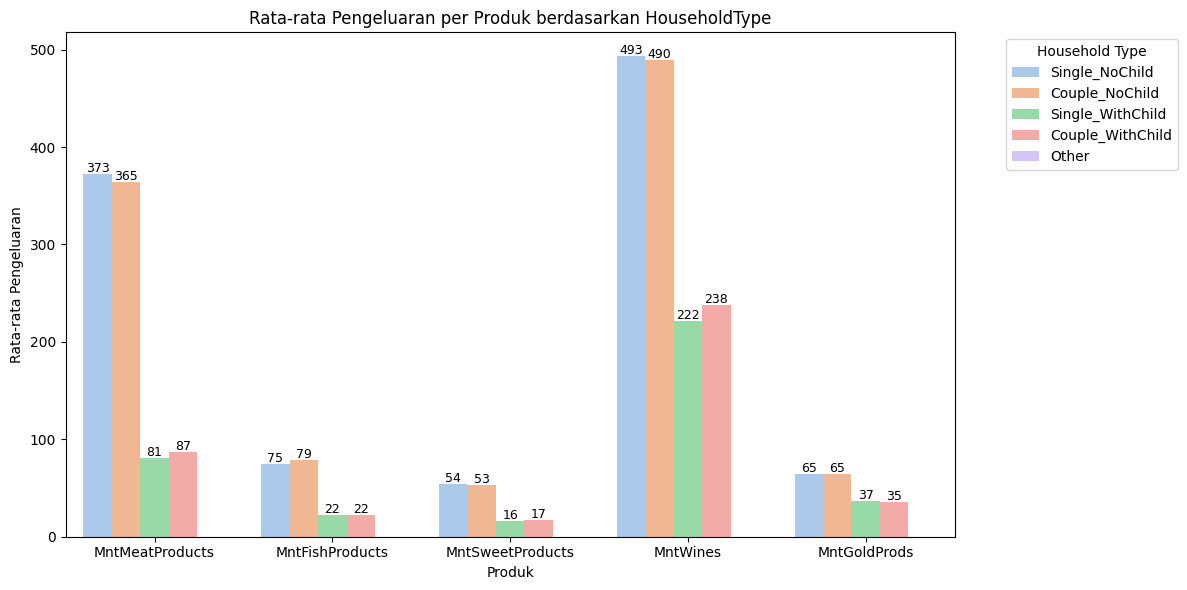

In [ ]:
product_cols = ['MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntWines', 'MntGoldProds']


avg_spending_type = df.groupby('HouseholdType')[product_cols].mean().reset_index()

df_melt_type = avg_spending_type.melt(id_vars='HouseholdType', var_name='Product', value_name='AvgSpending')

ordered_types = [
    'Single_NoChild', 
    'Couple_NoChild', 
    'Single_WithChild', 
    'Couple_WithChild', 
    'Other'
]

df_melt_type['HouseholdType'] = pd.Categorical(
    df_melt_type['HouseholdType'],
    categories=ordered_types,
    ordered=True
)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_melt_type, x='Product', y='AvgSpending', hue='HouseholdType', palette='pastel')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 2, f'{height:.0f}', ha="center", fontsize=9)

plt.title('Rata-rata Pengeluaran per Produk berdasarkan HouseholdType')
plt.ylabel('Rata-rata Pengeluaran')
plt.xlabel('Produk')
plt.legend(title='Household Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Hasil visualisasi di atas menyimpulkan bahwa:

- **Couple_NoChild** dan **Single_NoChild** adalah segmen dengan pengeluaran tertinggi untuk hampir semua kategori produk, khususnya pada produk premium seperti MntWines dan MntGoldProds, masing-masing menghabiskan rata-rata hingga $490–$493 untuk wine dan $65 untuk produk emas. Ini menguatkan asumsi bahwa segmen tanpa anak memiliki kapasitas pengeluaran lebih tinggi untuk kebutuhan non-pokok atau lifestyle.

- **Couple_WithChild** dan **Single_WithChild** menunjukkan pengeluaran yang jauh lebih rendah untuk semua kategori, termasuk bahan pokok seperti meat dan fish. Mereka hanya menghabiskan sekitar $81–$87 untuk daging dan kurang dari $40 untuk produk emas. Hal ini mencerminkan keterbatasan daya beli dan kemungkinan pergeseran prioritas belanja untuk kebutuhan rumah tangga dan anak.

Berdasarkan temuan dari dua visualisasi tersebut, maka asumsi yang sebelumnya telah disebutkan dapat dijawab sebagai berikut:
- **Pembelanjaan `MntMeatProducts` dan `MntFishProducts` pada keluarga dengan banyak anggota lebih besar: Ditolak** – Rumah tangga lebih besar tidak mengeluarkan biaya lebih besar untuk MntMeatProducts dan MntFishProducts; justru rumah tangga tanpa anak (ukuran rumah tangga paling kecil) yang tertinggi.

- **Pembelanjaan `MntSweetProducts`pada keluarga dengan anak lebih besar: Ditolak**  – Rumah tangga dengan anak tidak lebih banyak mengalokasikan biaya untuk MntSweetProducts; segmen tanpa anak lebih tinggi.

- **Pembelanjaan `MntWines` dan `MntGoldProds`pada rumah tangga tanpa anak lebih besar: Diterima** – Rumah tangga tanpa anak memang mengalokasikan biaya lebih besar untuk MntWines dan MntGoldProds.

#### Produk dengan Penjualan Tertinggi per Segmen

Karena kita sudah memahami segmen mana yang paling berkontribusi terhadap penjualan per produk, kini kita akan mencari insight mengenai preferensi belanja setiap segmen itu sendiri. Hal ini terutama mendukung supermarket dalam memilih produk mana yang akan dimasukkan dalam kampanye atau dikenakan promosi, terutama karena sudah tahu kampanye seperti apa yang akan dibuat berdasarkan persona pembelinya.

Analisis ini bertujuan untuk menjawab:
- Produk apa yang paling populer di tiap segmen?
- Produk mana yang paling potensial untuk dibuat targeted campaign berdasarkan segmen tertingginya?
    - Produk mana yang berpotensial paling banyak mendapat respons terhadap diskon?
    - Produk mana yang potensial untuk campaign ulang (repeat campaign)

Sebelumnya, mari buat tabel pivot untuk memmbuat dua kolom baru bernama 'Product Type' dan 'Amount Spent' untuk  mempermudah analisis produk dengan penjualan tertinggi di tiap segmen pelanggan. Dengan menyatukan kolom-kolom pengeluaran produk ke dalam satu kategori, kita dapat membandingkan performa tiap jenis produk secara lebih efisien.

In [ ]:
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df_melted = pd.melt(
    df,
    id_vars=[col for col in df.columns if col not in product_cols],
    value_vars=product_cols,
    var_name='ProductCategory',
    value_name='AmountSpent'
)

df_melted['ProductCategory'] = df_melted['ProductCategory'].str.replace('Mnt', '', regex=False)
df_melted['ProductCategory'] = df_melted['ProductCategory'].str.replace('Prods', '', regex=False)
df_melted['ProductCategory'] = df_melted['ProductCategory'].str.replace('Products', '', regex=False)

df_melted.to_excel("/Users/dugiyadi/Documents/JCDS-2702/CAPSTONE/CAPSTONE 2/CLEAN_Supermarket Customers.xlsx", index=False)


#### Rata-Rata Penjualan Produk Per Segmen

<Figure size 1200x700 with 0 Axes>

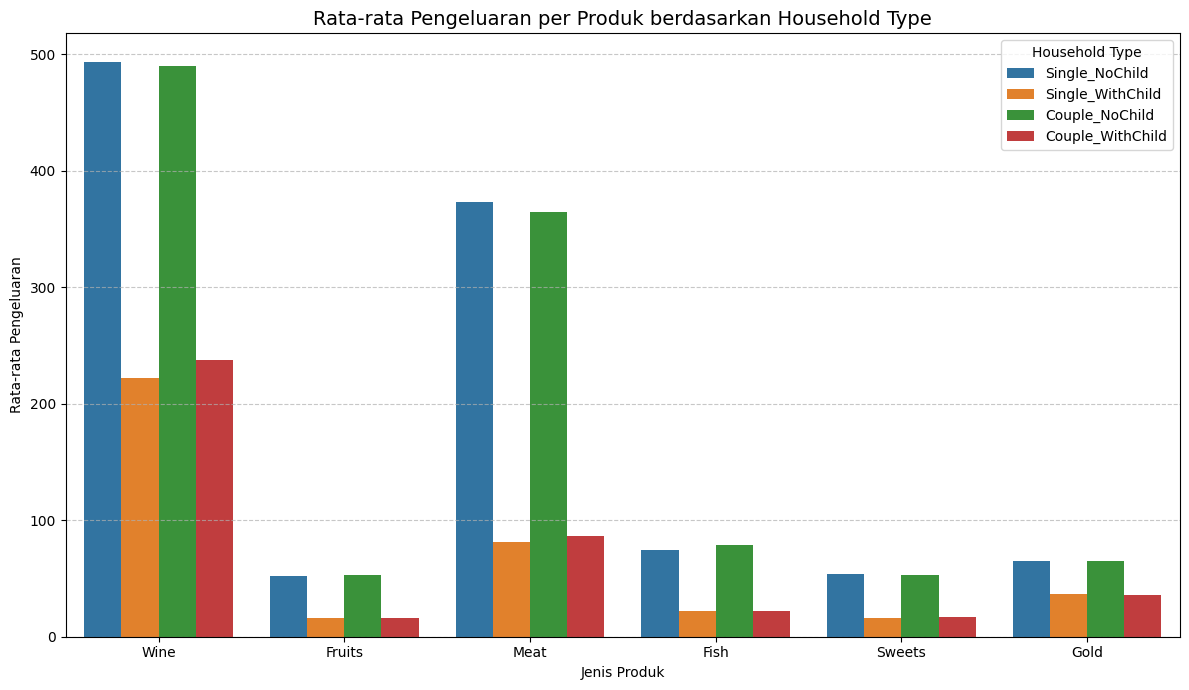

In [ ]:
plt.figure(figsize=(12, 7))

product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df_melted = pd.melt(
    df,
    id_vars='HouseholdType',
    value_vars=product_cols,
    var_name='Product',
    value_name='AmountSpent'
)
product_labels = {
    'MntWines': 'Wine',
    'MntFruits': 'Fruits',
    'MntMeatProducts': 'Meat',
    'MntFishProducts': 'Fish',
    'MntSweetProducts': 'Sweets',
    'MntGoldProds': 'Gold'
}
df_melted['Product'] = df_melted['Product'].map(product_labels)

plt.figure(figsize=(12, 7))
sns.barplot(
    data=df_melted,
    x='Product',
    y='AmountSpent',
    hue='HouseholdType',
    estimator='mean',
    ci=None
)

plt.title('Rata-rata Pengeluaran per Produk berdasarkan Household Type', fontsize=14)
plt.xlabel('Jenis Produk')
plt.ylabel('Rata-rata Pengeluaran')
plt.legend(title='Household Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Kesimpulan yang dapat didapat dari diagram di atas adalah:
- Produk **Wine** dan **Meat** adalah produk dengan rata-rata pengeluaran tertinggi di setiap segmen dengan segmen **Couple_NoChild** paling menonjol dalam pengeluaran Wine dan Meat.
- Produk **Fruits, Fish, Sweets** dan **Gold** memiliki rata-rata pengeluaran rendah di semua segmen.

Kemudian berdasarkan kebiasaan belanja per segmen terhadap produk dapat disimpulkan bahwa:
- **Single_NoChild** dan **Couple_NoChild** memiliki pengeluaran paling tinggi untuk semua produk, terutama di kategori produk Wine dan Meat
-  Segmen dengan anak (**Single_WithChild** dan **Couple_WithChild**) cenderung belanja lebih rendah dan merata.

Namun, ada yang perlu diperhatikan mengenai tingginya beberapa pengeluaran di kategori tertentu, terutama kategori Wine di mana semua segmen mengeluarkan biaya yang paling tinggi dibandingkan jenis produk lainnya. Bisa jadi penghasilan yang besar pada kategori Wine disebabkan beberapa faktor, salah satunya harga kategori produk "Wine" yang termasuk dalam kelas premium di kebanyakan supermarket. Dengan asumsi bahwa kategori produk Wine tidak mencakup jenis minuman beralkohol lain yang berpotensi masuk kelas harga lebih rendah seperti bir dan minuman alkohol berkaleng, Wine sendiri diposisikan dan dijual sebagai produk berkategori premium di kebanyakan supermarket hingga menjadi salah satu penyumbang porsi signifikan penjualan supermarket. Menurut artikel industri yang dikeluarkan Market Watch pada tahun 2020, penjualan Wine mengungguli kategori lain dari segi volume dan nilai penjualan, meskipun beralih dari penjualan luring ke daring.

Visualisasi di atas juga mampu menjawab pertanyaan yang sudah kita ajukan di awal bagian ini:
- **Produk paling populer di tiap segmen**: Wine dan Meat terbukti menjadi produk dengan rata-rata pengeluaran tertinggi, terutama oleh segmen Single_NoChild dan Couple_NoChild. Sementara itu, segmen dengan anak tetap menunjukkan minat tertinggi pada Wine, meskipun dengan nominal lebih rendah.

- **Produk paling potensial untuk targeted campaign berdasarkan segmen tertingginya**: Wine dan Meat layak menjadi target campaign karena konsisten menjadi produk favorit pada segmen dengan daya beli tinggi, yakni Single_NoChild dan Couple_NoChild.
    - **Produk yang berpotensi mendapat respons terhadap diskon dari segmen lain:**  Single_WithChild dan Couple_WithChild adalah segmen paling responsif terhadap diskon. Maka, campaign diskon untuk produk seperti Wine dan Meat di segmen ini sangat berpotensi sukses, meskipun daya beli awalnya lebih rendah.
    -**Produk yang potensial untuk campaign ulang (repeat campaign)**: Karena pengeluaran tinggi sudah terbukti pada Wine dan Meat di segmen Single_NoChild dan Couple_NoChild, maka campaign berulang pada produk ini berpotensi memperkuat loyalitas dan meningkatkan frekuensi pembelian.

## Kesimpulan dan Rekomendasi

### Kesimpulan:


#### Komposisi Segmen Pelanggan

Melalui visualisasi di atas, kita dapat menyimpulkan bahwa segmen pelanggan di supermarket XYZ berdasarkan rumah tangganya adalah sebagai berikut:
- Segmen pelanggan dibagi berdasarkan jumlah orang dewasa dan jumlah anak termasuk remaja dan anak-anak. Hasilnya, segmen pelanggan di supermarket XYZ berdasarkan tipe struktur rumah tangga terdiri dari:
    - **Single_NoChild** atau lajang tanpa anak dengan presentase 11.4% dengan jumlah 252 orang pelanggan. Segmen ini merupakan **segmen pelanggan paling sedikit**
    - **Couple_NoChild** atau pasangan tanpa anak dengan presentase 17.2% dengan jumlah 381 orang pelanggan. Merupakan segmen paling sedikit kedua.
    - **Single_WithChild** atau lajang dengan anak dengan dengan presentase 24.1% dengan jumlah 533 orang pelanggan dan merepresentasikan segmen paling terbanyak kedua.
    - **Couple_WithChild** atau pasangan dengan anak dengan presentase 7.4% dengan jumlah 1049 orang pelanggan. Segmen ini mendominasi pelanggan Supermarket XYZ, sehingga layak untuk dipertimbangkan dalam analisis atau pengambilan keputusan yang berkaitan dengan segmentasi pelanggan.
  
  Sebagai analisis tambahan, disertakan juga analisis segmentasi pelanggan berdasarkan ukuran rumah tangga dengan hasil sebagai berikut:
    - **No Children** atau rumah tangga dengan jumlah anak 0 yaitu 28.6% dengan jumlah 633 pelanggan. Sebagai segmen pelanggan kedua terbesar, segmen ini sangat mungkin untuk dipertimbangkan dalam pengambilan keputusan atau analisis.
    - **Small Family** atau keluarga dengan satu atau dua anak mencapai 69.2% dengan jumlah 1532 pelanggan. Sebagai segmen pelanggan terbesar berdasarkan ukuran rumah tangga, segmen dengan karakteristik ini penting untuk dipertimbangkan dalam pengambilan keputusan atau analisis yang berkaitan dengan ukuran struktur rumah tangga. 
    - **(Large Family)**, keluarga dengan lebih dari dua anak merupakan segmen terkecil, yaitu 2.3% dengan 50 pelanggan.
  
  Analisis ini akan berfokus pada tipe struktur rumah tangga atau **`HouseholdType`** karena memberikan segmentasi yang lebih tajam dan relevan untuk tujuan campaign targeting. Kolom `HouseholdType` sangat tepat untuk campaign targeting karena dengan jelas membedakan persona pelanggan berdasarkan ada tidaknya anak di rumah dan status hubungan (lajang atau berpasangan), yang sangat berkaitan dengan gaya hidup.

#### Pendapatan per Segmen

- Segmen Single_NoChild dan Couple_NoChild memiliki rata-rata pendapatan tertinggi, masing-masing sekitar $65.000. Segmen ini juga menunjukkan daya beli lebih tinggi, dengan rata-rata pengeluaran mendekati $1.100.
- Sebaliknya, Couple_WithChild dan Single_WithChild memiliki pendapatan lebih rendah, sekitar $45.000, serta pengeluaran rata-rata yang lebih rendah, yaitu sekitar $400.
- Sebagian besar pelanggan dari segmen dengan anak memperlihatkan pengeluaran yang cenderung rendah dan terdistribusi di kisaran yang lebih kecil.


#### Penggunaan Diskon

- Segmen Couple_WithChild dan Single_WithChild memiliki rata-rata penggunaan diskon tertinggi (sekitar 2.8), sedangkan Couple_NoChild dan Single_NoChild memiliki angka penggunaan diskon yang lebih rendah (sekitar 1).
- Tingginya penggunaan diskon pada segmen dengan anak selaras dengan rata-rata pendapatan mereka yang lebih rendah.

#### Respons terhadap Kampanye

- Segmen Single_NoChild menunjukkan tingkat penerimaan kampanye tertinggi, diikuti oleh Couple_NoChild.
- Segmen dengan anak (Single_WithChild dan Couple_WithChild) merupakan yang paling rendah dalam penerimaan kampanye.
- Segmen dengan penerimaan kampanye yang tinggi juga merupakan segmen dengan daya beli dan pendapatan yang tinggi.

#### Preferensi Produk per HouseholdType

- Produk dengan pengeluaran rata-rata tertinggi adalah Wine dan Meat, khususnya oleh segmen Couple_NoChild dan Single_NoChild.
- Segmen dengan anak menunjukkan pengeluaran yang lebih rendah di seluruh kategori produk.
- Segmen tanpa anak mengalokasikan lebih banyak pengeluaran untuk produk premium seperti Wines dan Gold, sedangkan segmen dengan anak menunjukkan pengeluaran yang lebih rendah dan merata di semua kategori produk.

#### Temuan Tambahan dari Preferensi Produk

- Pengeluaran untuk MntMeatProducts dan MntFishProducts tidak lebih tinggi pada segmen dengan anak, melainkan lebih tinggi pada segmen tanpa anak.
- Tidak terdapat bukti bahwa segmen dengan anak mengalokasikan lebih banyak untuk MntSweetProducts.
- Pengeluaran untuk MntWines dan MntGoldProds terbukti lebih tinggi pada segmen tanpa anak.

#### **Kesimpulan Akhir**

- Segmen tanpa anak (Single_NoChild dan Couple_NoChild) memiliki karakteristik daya beli dan respons kampanye yang tinggi, serta kecenderungan membli dalam volume banyak di semua aktegori termasuk Meat Products dan pengeluaran pada produk premium, seperti Wine.

- Segmen dengan anak (Single_WithChild dan Couple_WithChild) menunjukkan sensitivitas terhadap diskon, pengeluaran lebih rendah, dan preferensi belanja yang lebih hemat.

- Dari segi Return of Investment (ROI) kampanye jangka panjang berdasarkan konsistensi dan jumlah pendapatan dari perilaku berbelanja tiap segmentasi, segmen tanpa anak (Single_NoChild dan Couple_NoChild) merupakan segmen paling kuat.

### Rekomendasi

#### Rekomendasi Targeted Campaign ####

Adapun targeted campaign yang bisa dirancang dari hasil analisis adalah sebagai berikut:
1. Karena marketing Supermarket XYZ diharapkan efisien secara biaya promosi namun tetap menghasilkan value yang tinggi dan stabil secara jangka panjang, maka disarankan menyasar ke segmen tanpa anak yaitu **Single_NoChild** & **Couple_NoChild** karena kedua segmen tersebut tidak hanya menghasilkan penjualan yang tinggi namun karena kebiasaan belanja mereka yang cenderung konsisten serta penerimaan yang sangat tinggi terhadap kampanye. Hal ini mendandakan kedua segmen tersebut sebagai **high-value customer**.
2. Marketing campaign sebaiknya difokuskan pada kategori-kategori produk yang sudah terbukti menjadi favorit segmen ini, seperti **Wine** dan **Meat**. Terlebih lagi, kedua kategori produk tersebut telah terbukti menyumbang porsi penjualan yang lebih besar dan signifikan dibanding produk-produk lainnya.
3. Campaign perlu dijalankan secara berkala dan konsisten dan memanfaatkan berbagai macam channel yang mungkin dipakai oleh segmen-segmen ini misalnya seperti website, social media, dan lain-lain untuk mendorong brand association dan pembelian berulang. 
4. Meski masih bisa dilakukan dalam jumlah yang dibatasi, hindari pendekatan berbasis diskon untuk segmen ini, karena analisis menunjukkan bahwa mereka memiliki penggunaan diskon paling rendah

Dengan mempersempit sasaran targeted campaign ke segmen pelanggan yang memiliki potensi pembelanjaan tinggi, diharapkan kampanye yang dihasilkan dapat membantu perusahaan meningkatkan efisiensi biaya pemasaran, serta meningkatkan profitabilitas dan menjaga loyalitas dari pelanggan yang paling bernilai.

##### Contoh Targeted Campaign: Strategi Pemasaran All Year Round Wine & Meat 

Contoh targeted campaign yang bisa disarankan berdasarkan produk favorit segmen high-value Single_NoChild & Couple_NoChild, yaitu untuk kategori Wine dan Meat. Untuk memaksimalkan penjualan keduanya sekaligus, supermarket dapat melakukan beberapa strategi:
1. Strategi bundling, misalnya membuat paket khusus charcuterie board yang umumnya berisi daging-dagingan dengan keju atau cemilan lain sebagai teman minum wine. Charcuterie board ini dapat dipromosikan all-year round atau bahkan pada hari-hari raya tertentu, seperti Natal dan Tahun Baru. Di sisi lain, strategi marketing juga dapat menarget segmen pelanggan terhadap persona mereka, misalnya Charcuterie Board for Couples di Hari Valentine.
2. Soft-selling melalui konten informatif atau edukasional dengan memanfaatkan berbagai kanal marketing luring atau daring. Misalnya, membuat konten di sosial media tentang jenis-jenis daging yang paling cocok dipadukan dengan white wine, red wine, atau rose wine. Supermarket juga dapat menggelar event luring seperti Wine Pairing dan Steak Tasting Event dengan mendatangkan bintang tamu yang ahli di bidang wine atau chef terkenal.

 **MENYIMPAN DATA BERSIH**

In [ ]:
df.to_csv("/Users/dugiyadi/Documents/JCDS-2702/CAPSTONE/CAPSTONE 2/CLEAN_Supermarket_Customers.csv", index=False)
